[IPython Notebook](animation_binary_complete.ipynb) |  [Python Script](animation_binary_complete.py)

Complete Binary Animation
============================

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new bundle.  See [Building a System](../tutorials/building_a_system.html) for more details.

In [1]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger(clevel='INFO')

b = phoebe.Bundle.default_binary()

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


Adding Datasets
--------------------

In [2]:
times = np.linspace(0,3,101)

In [3]:
b.add_dataset('LC', time=times, dataset='lc01')

<ParameterSet: 16 parameters | methods: LC, LC_dep>

In [4]:
b.add_dataset('RV', time=times, dataset='rv01')

<ParameterSet: 14 parameters | methods: RV, RV_dep>

Running Compute
--------------------

In [5]:
b.run_compute(store_mesh=True)

/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/mesh.py:1797: DeprecationWarning: PyArray_FromDims: use PyArray_SimpleNew.
  the_grid = cmarching.discretize(delta, maxpoints, *mesh_args)[:-2]
/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/mesh.py:1797: DeprecationWarning: PyArray_FromDimsAndDataAndDescr: use PyArray_NewFromDescr.
  the_grid = cmarching.discretize(delta, maxpoints, *mesh_args)[:-2]
/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/mesh.py:1797: DeprecationWarning: PyArray_FromDims: use PyArray_SimpleNew.
  the_grid = cmarching.discretize(delta, maxpoints, *mesh_args)[:-2]
/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/mesh.py:1797: DeprecationWarning: PyArray_FromDimsAndDataAndDescr: use PyArray_NewFromDescr.
  the_grid = cmarching.discretize(delta, maxpoints, *mesh_args)[:-2]
/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/eclipse.py:10: DeprecationWarning: PyArray_FromDims: use PyArray_SimpleNew.
  hull,

<ParameterSet: 6702 parameters | methods: RV, MESH, LC>

Plotting
-----------

See the [Animations Tutorial](../tutorials/animations) for more examples and details.

Here we'll create a figure with multiple subplots.  The top row will be the light curve and RV curve.  The bottom three rows will be various representations of the mesh (intensity, rv, and visibility).

First we'll create the subplots, then we'll create a dictionary for each plotting command we want to call for each frame of the animation.  These are then passed to animate as a list or tuple, along with the list of times.

**NOTE:** this call to animate is quite slow, mainly because of the need to check the maximum axes limits for each subplot for each time before beginning to plot.  This may be optimized in the future - but for now is just the way its going to have to be.


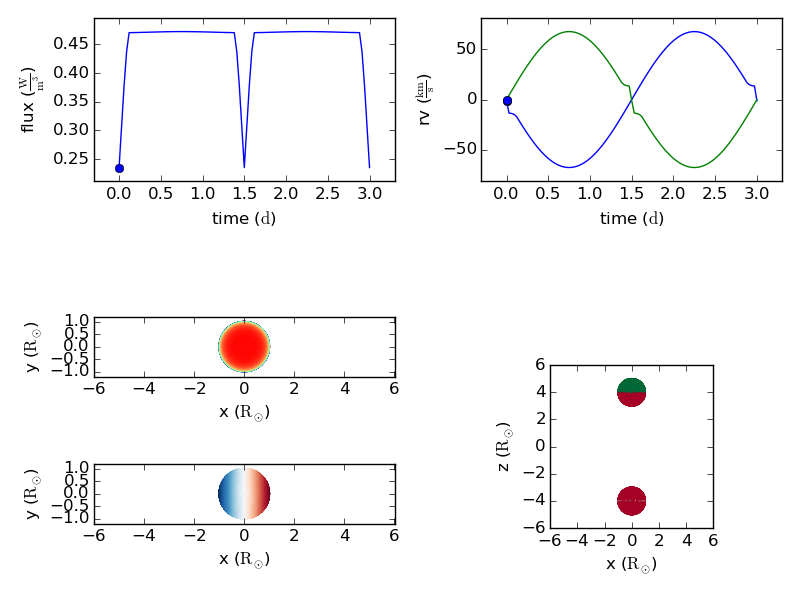
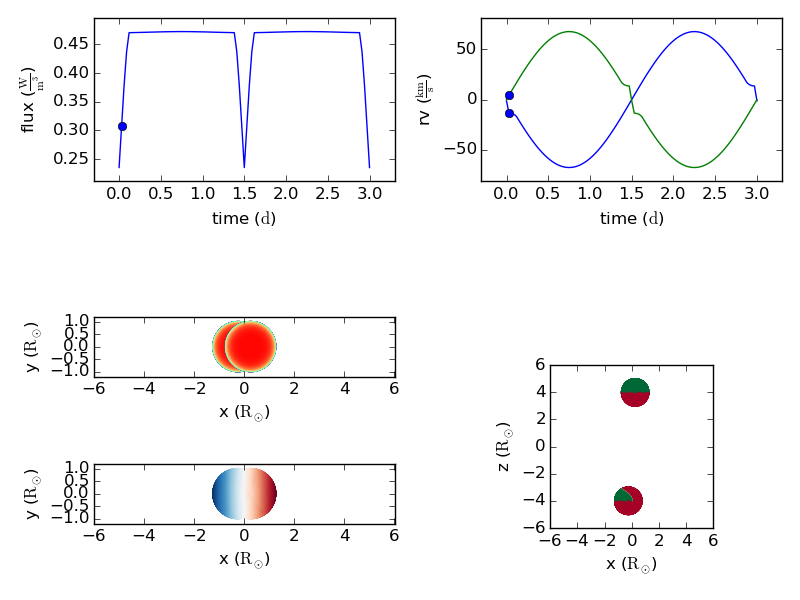
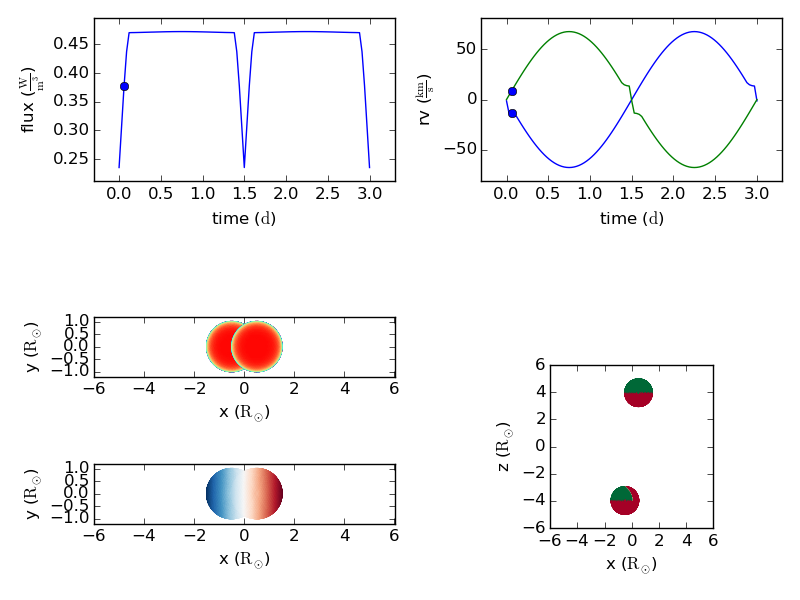
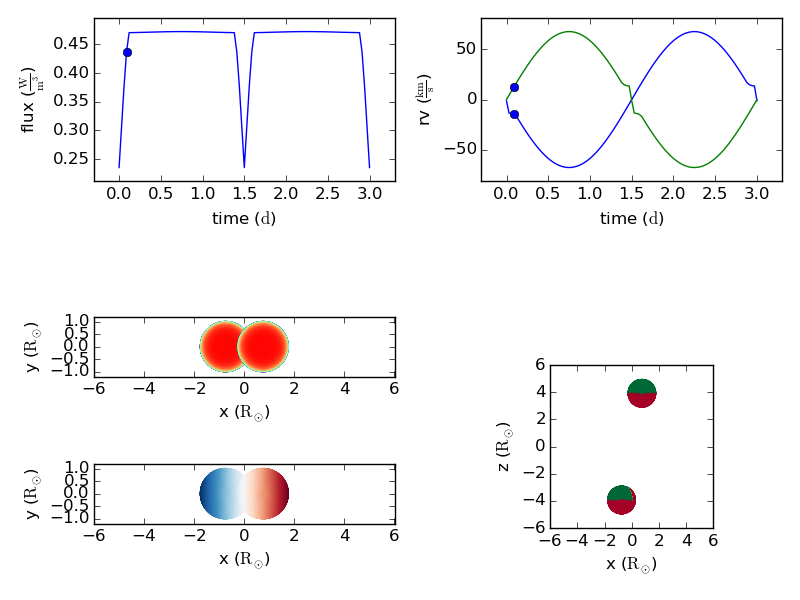
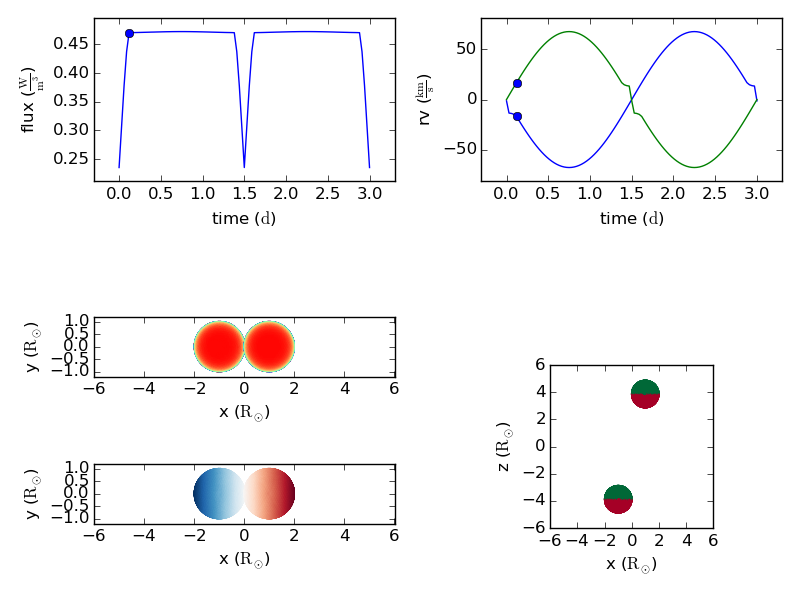
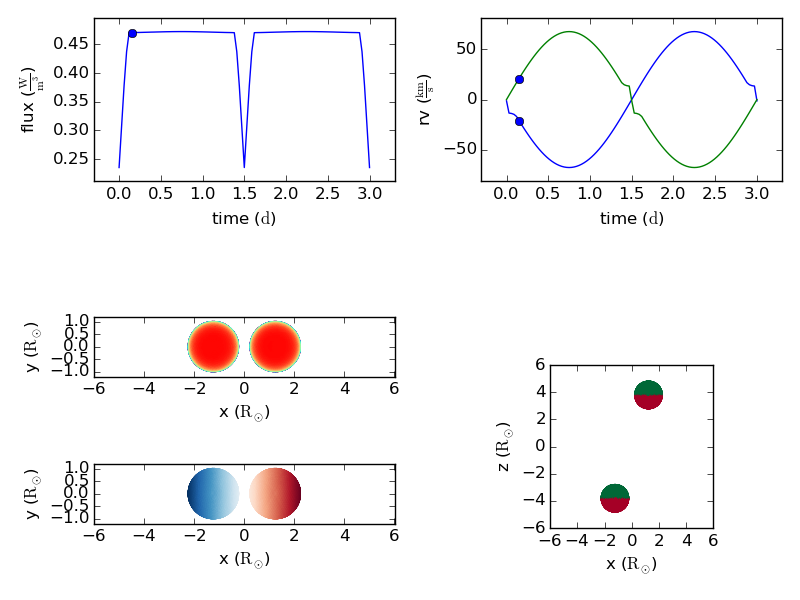
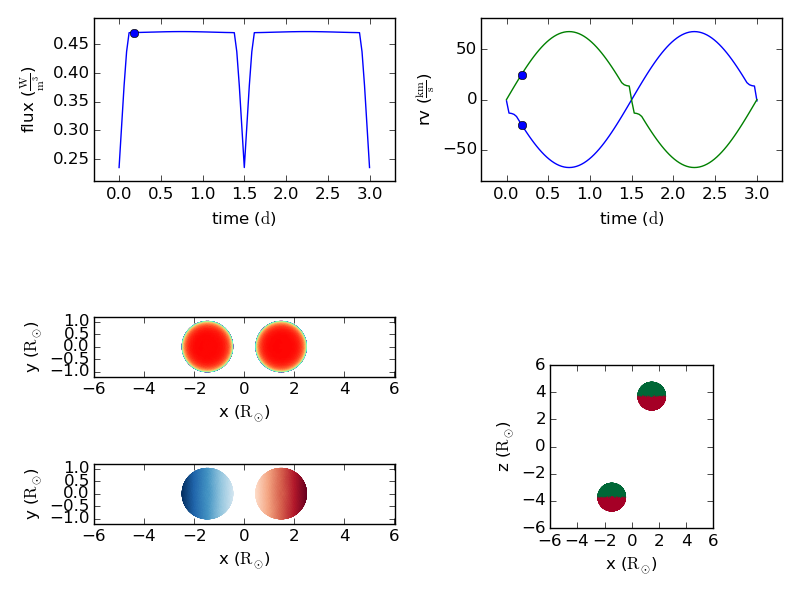
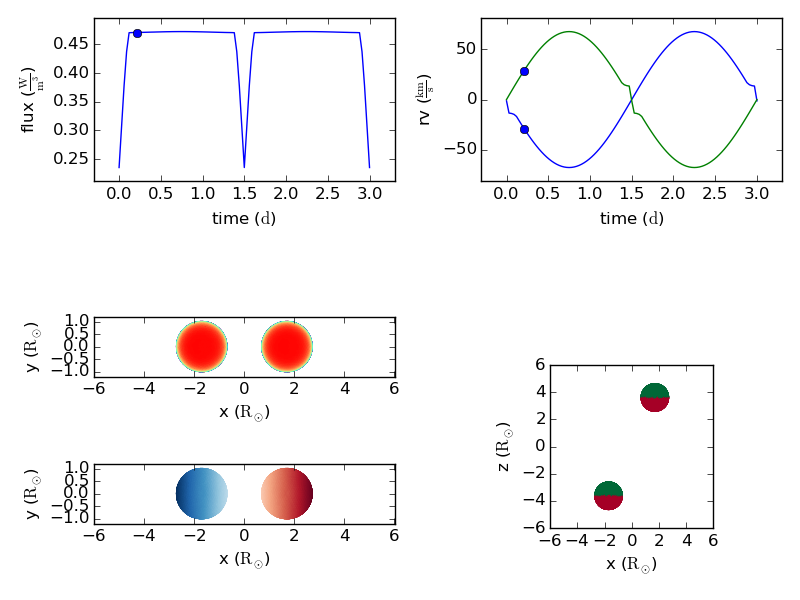
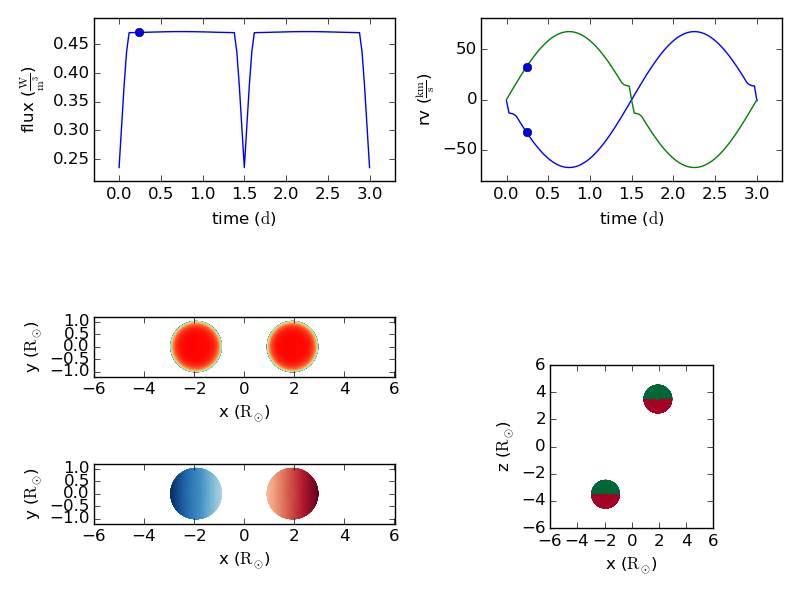
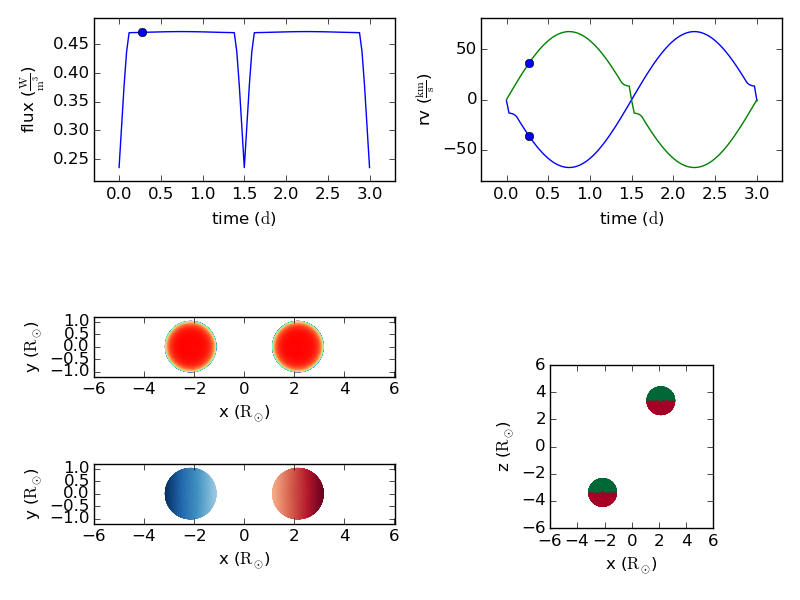
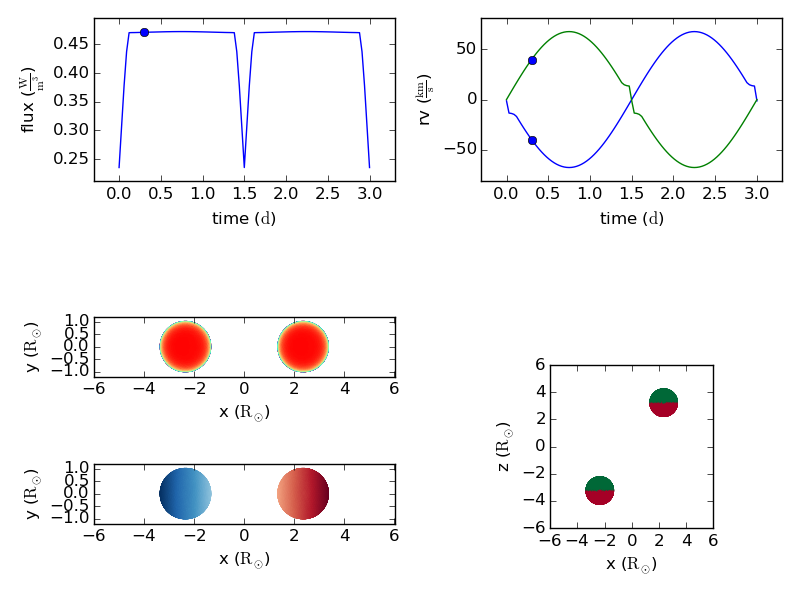
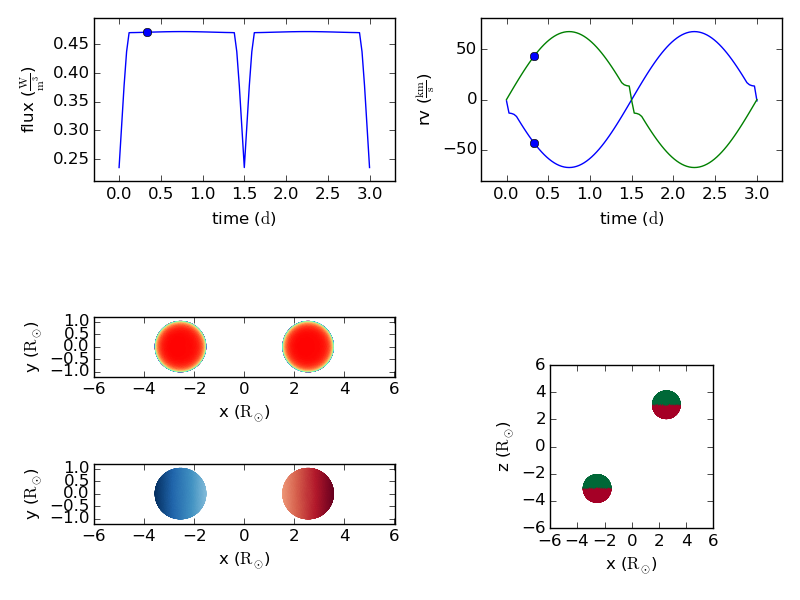
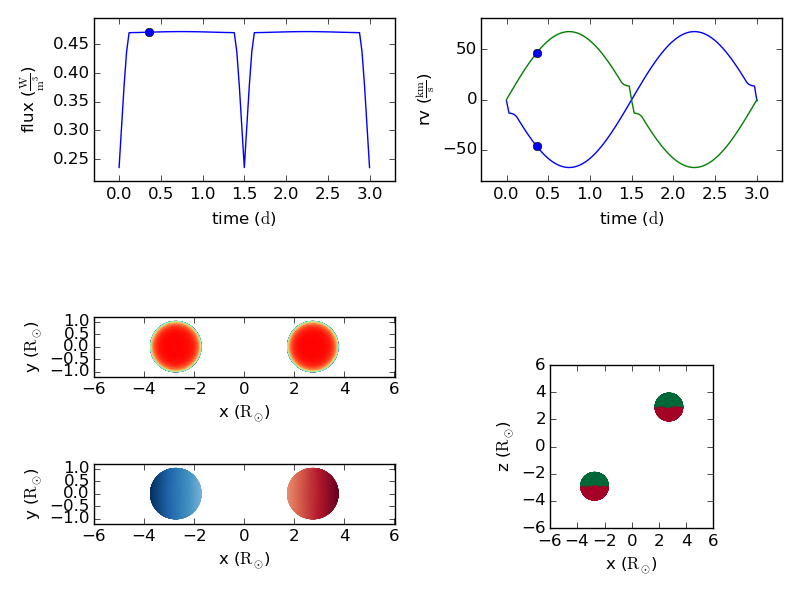
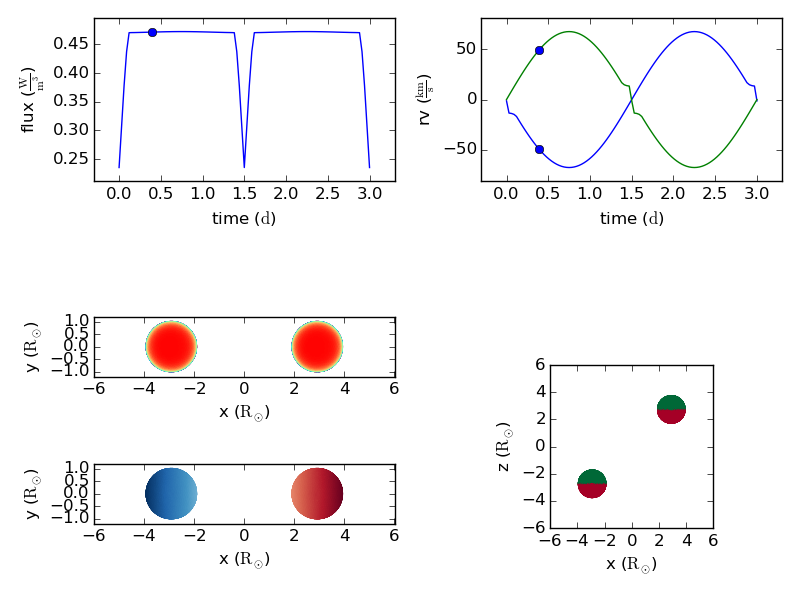
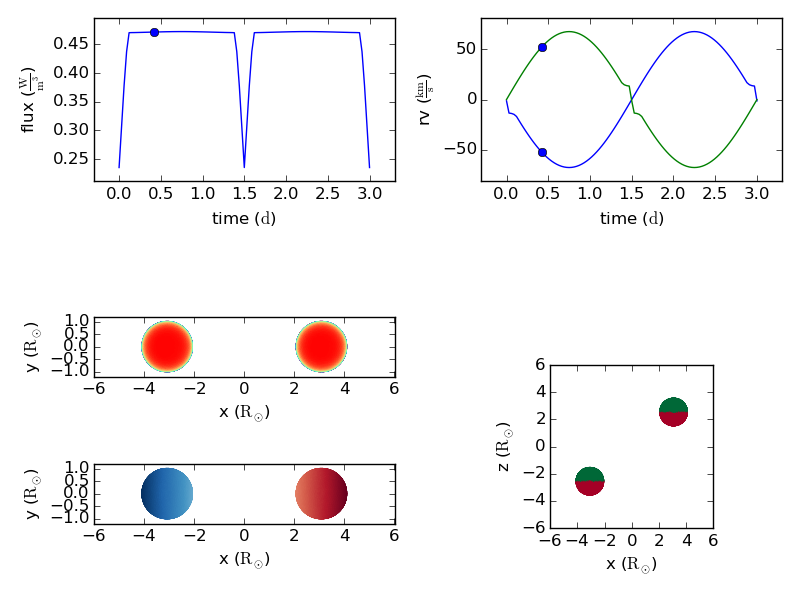
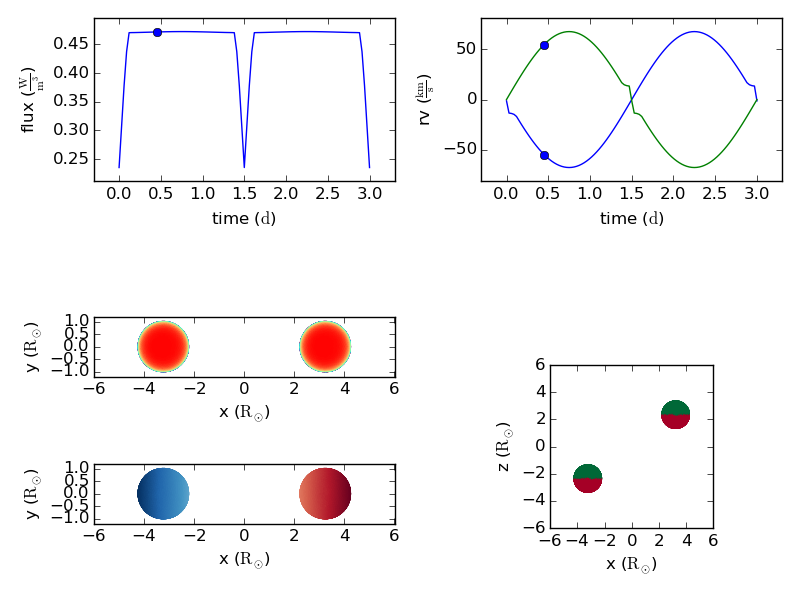
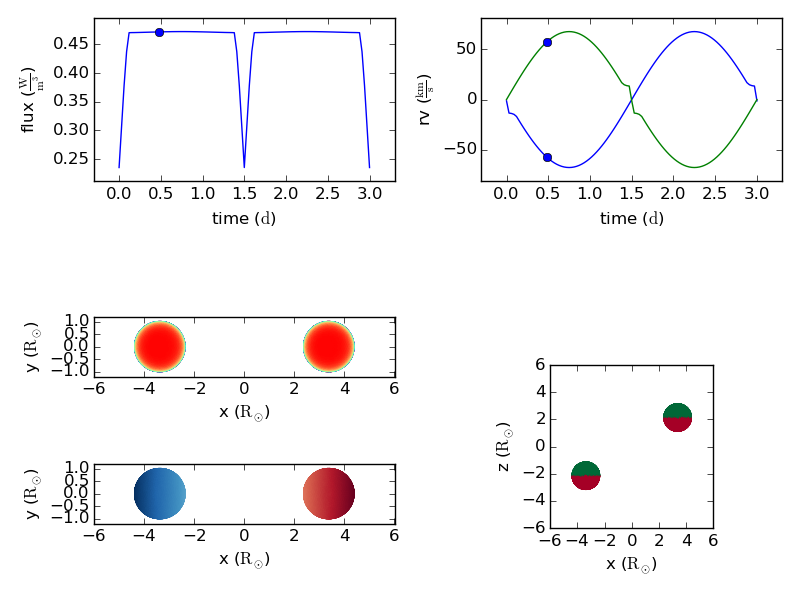
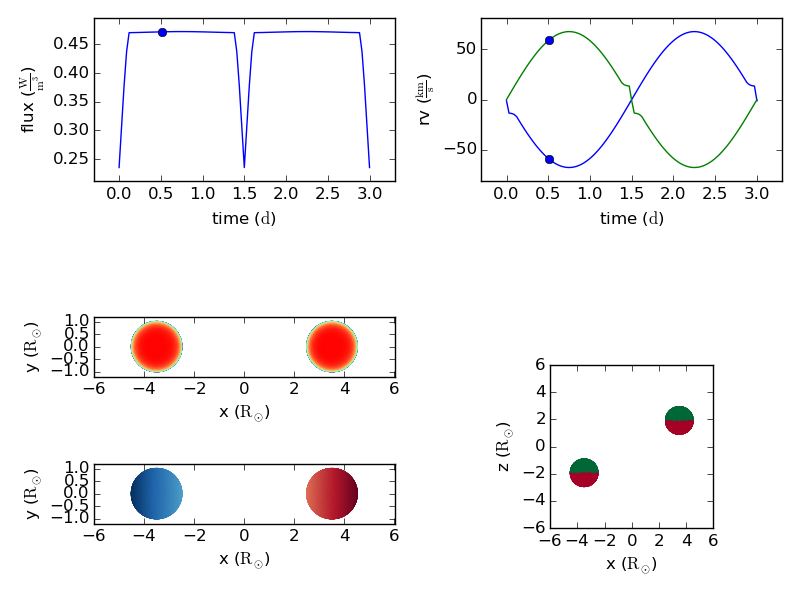
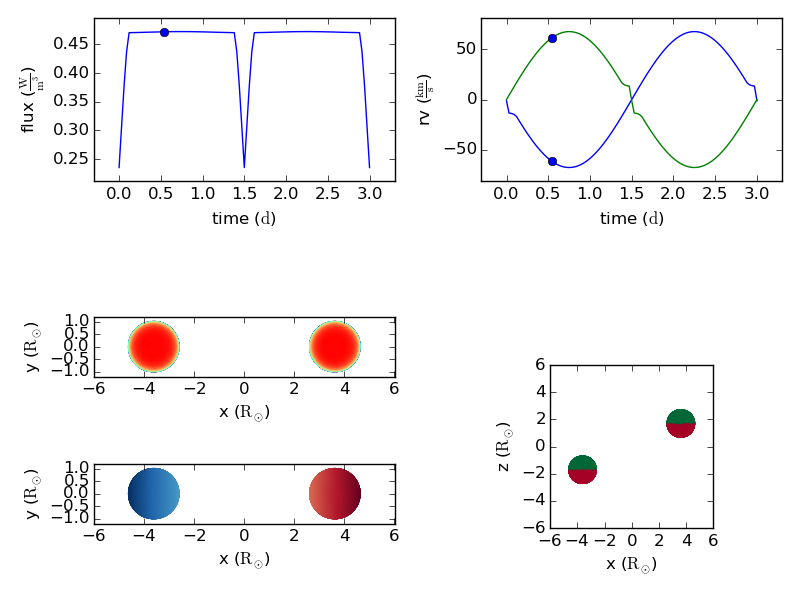
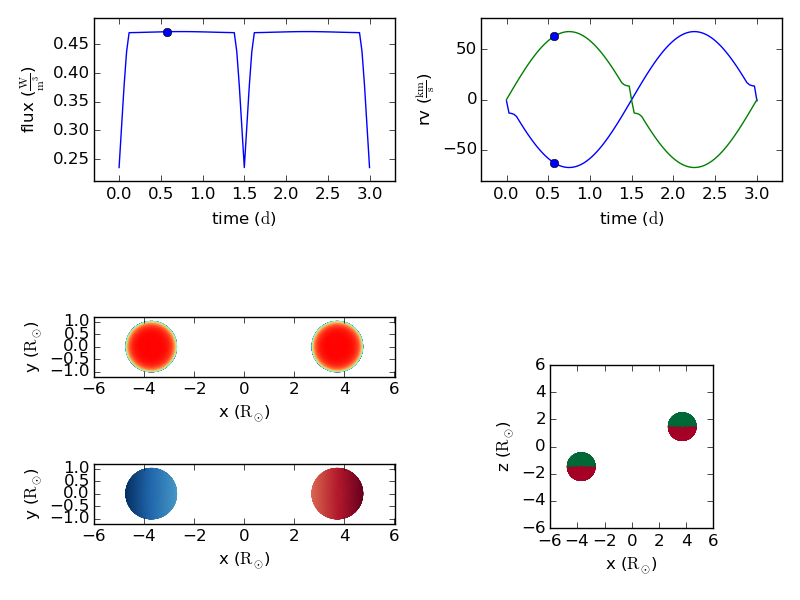
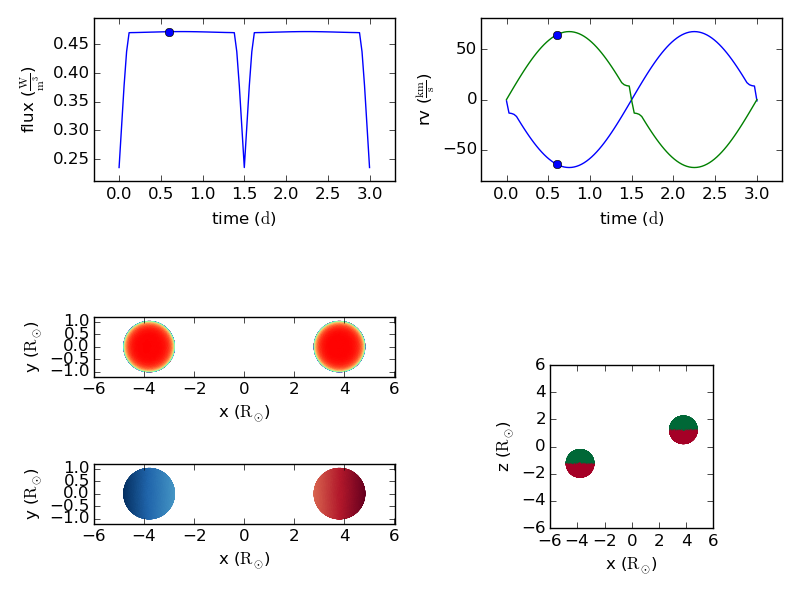
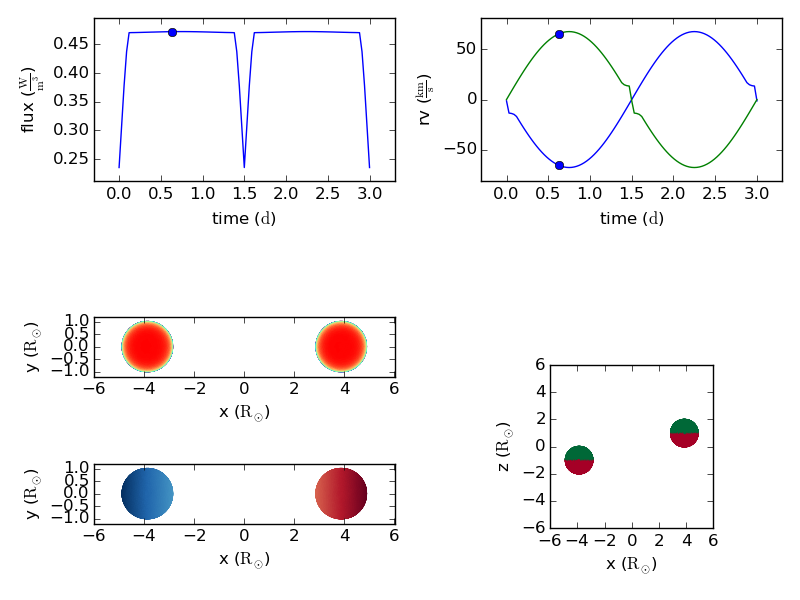
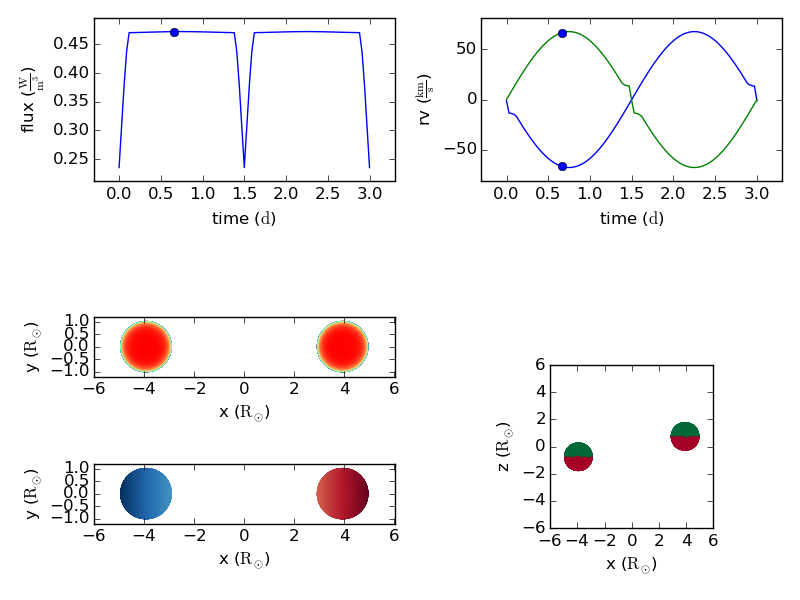
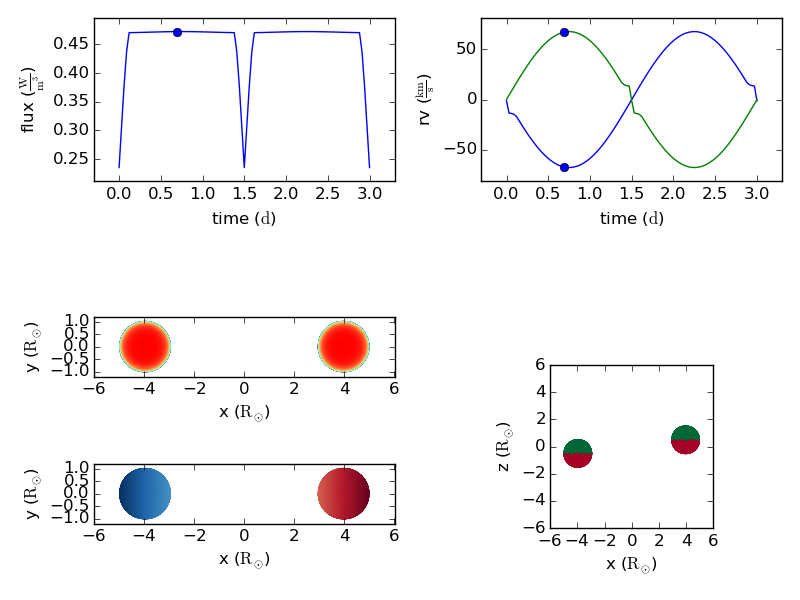
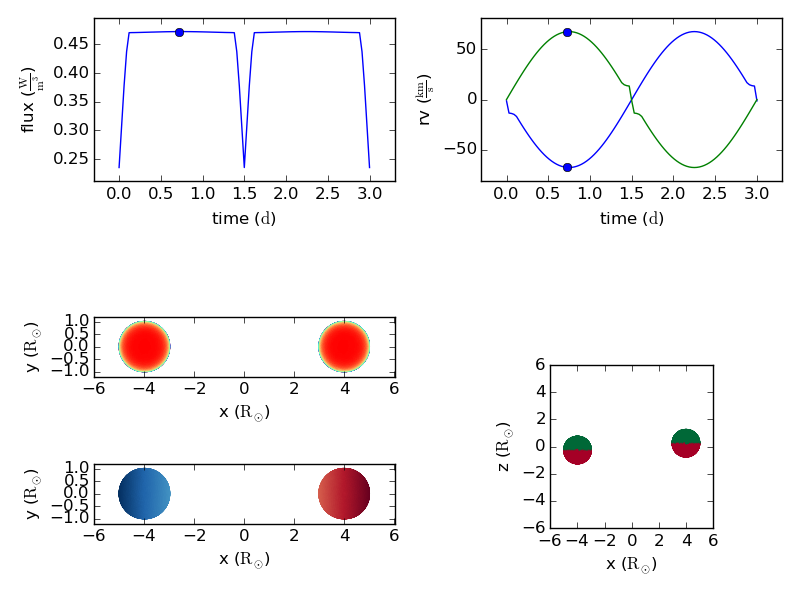
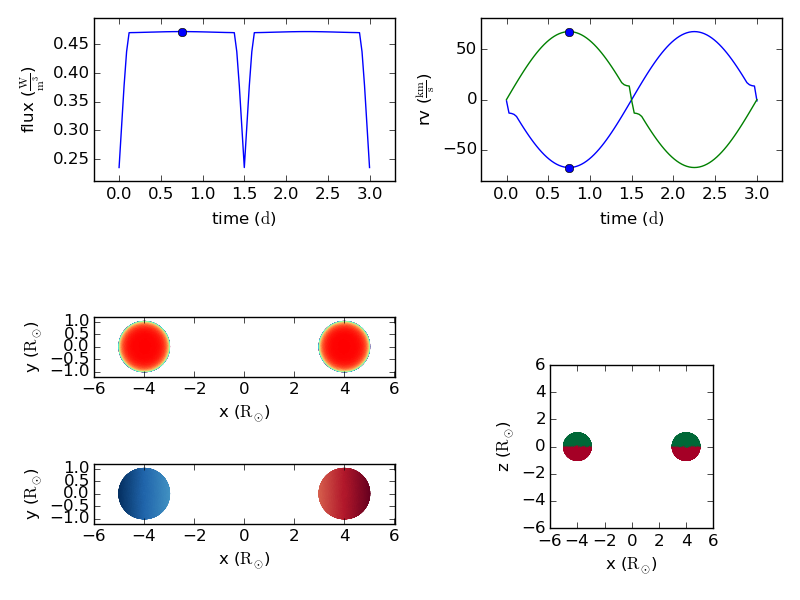
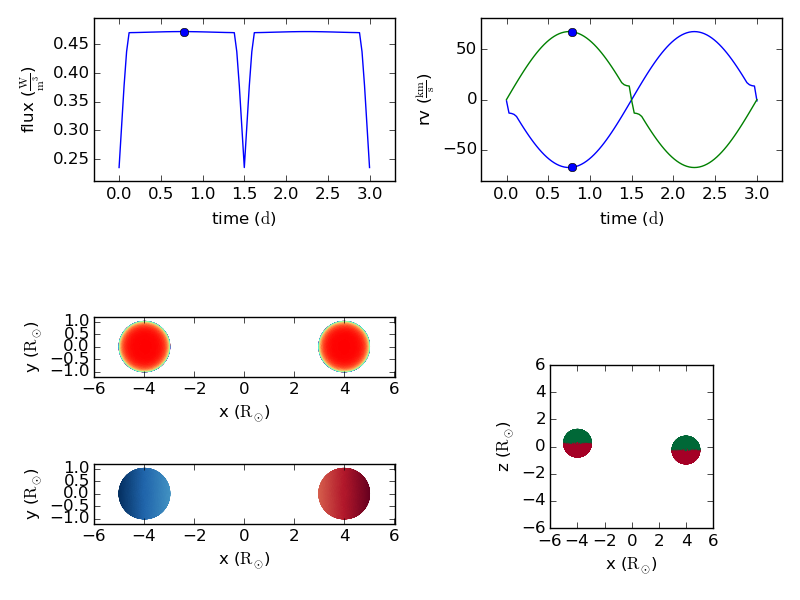
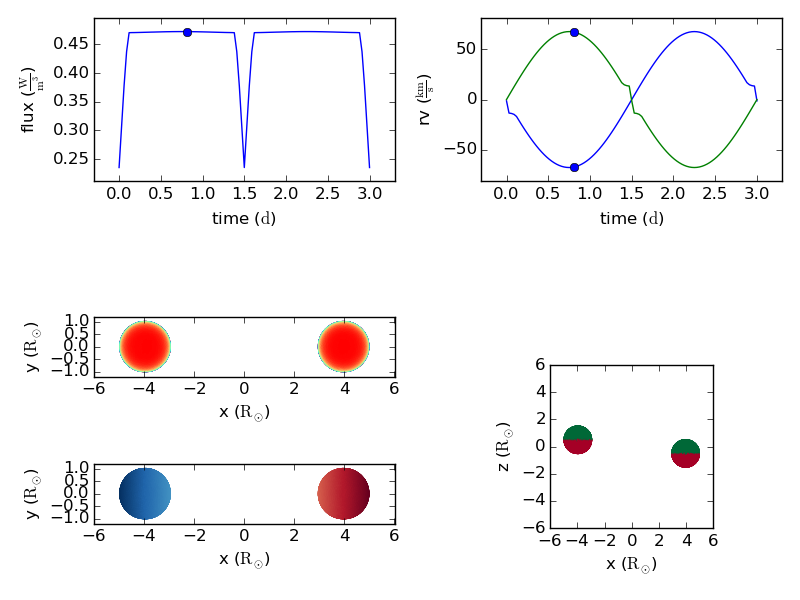
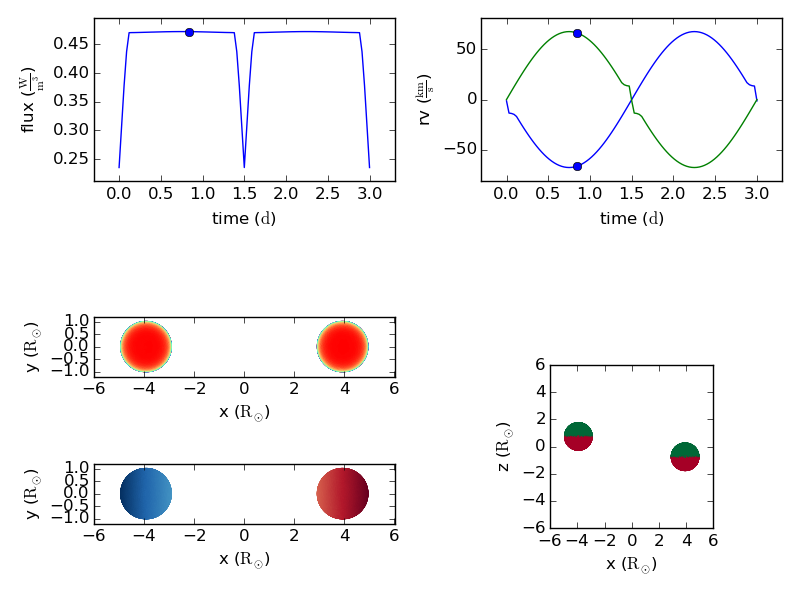
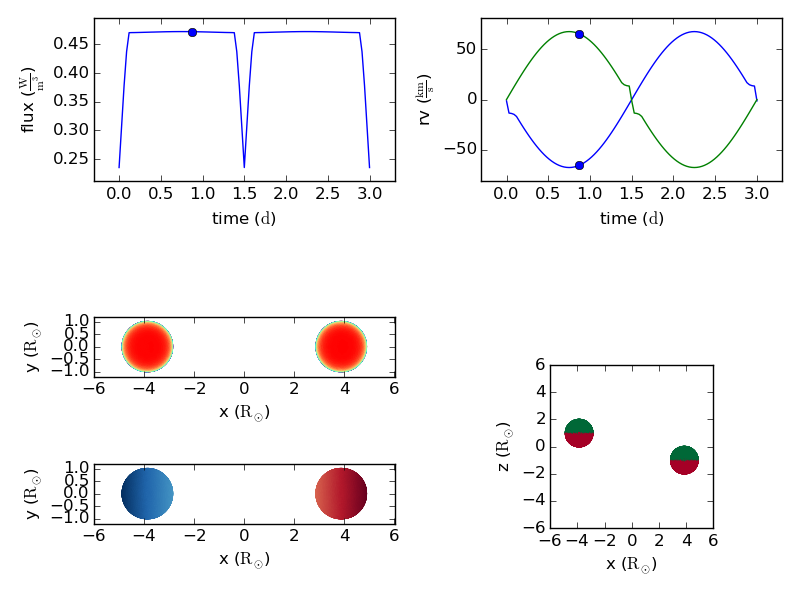
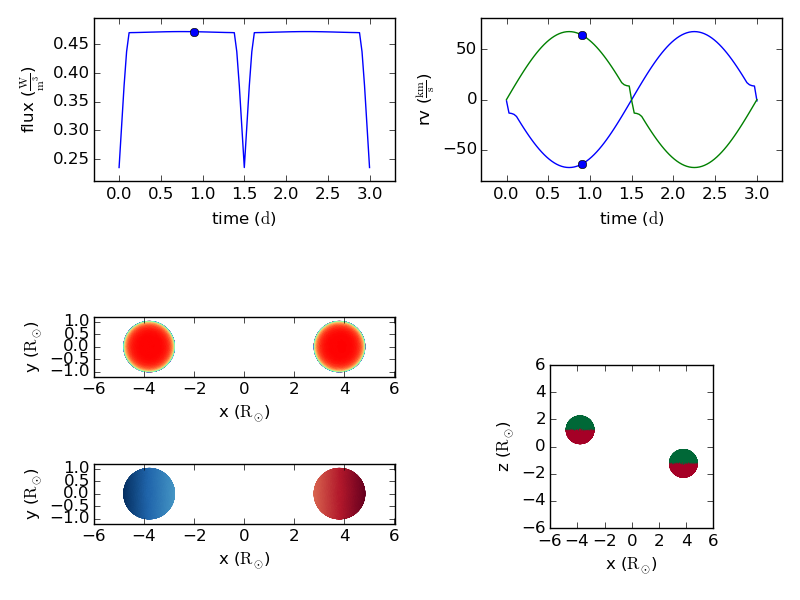
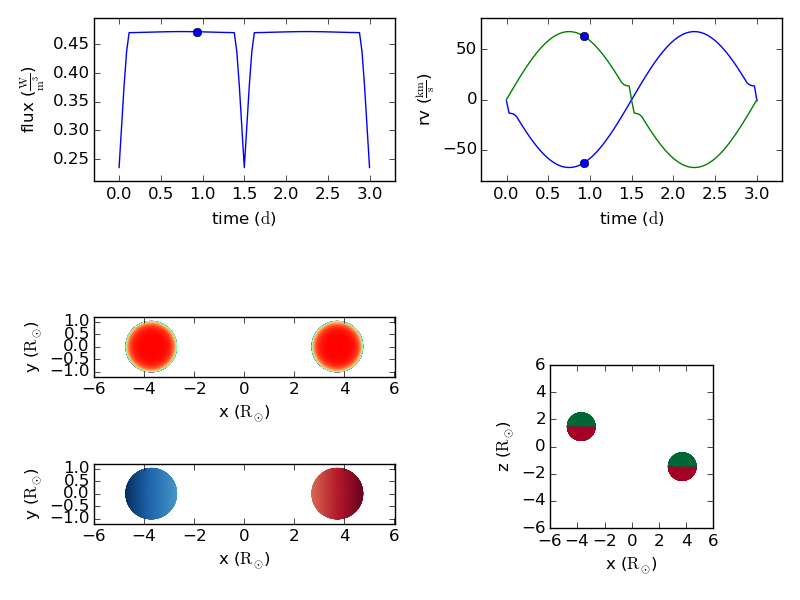
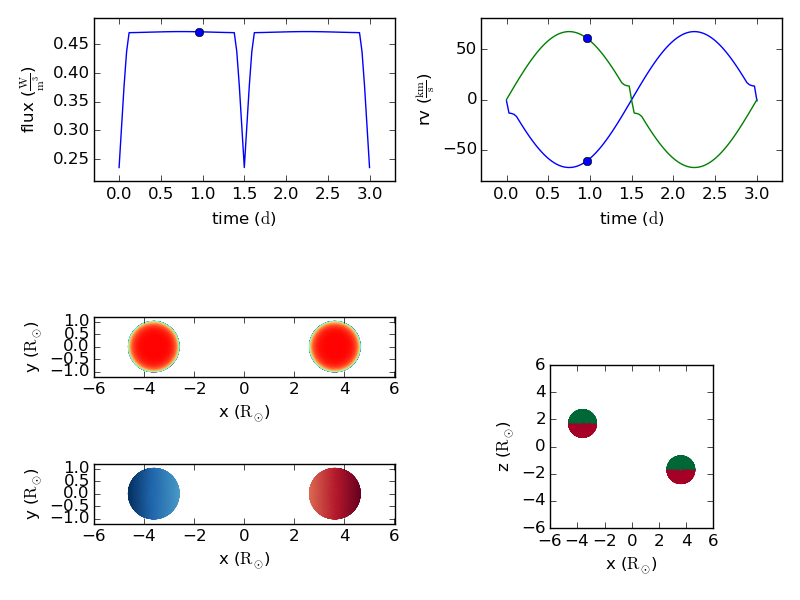
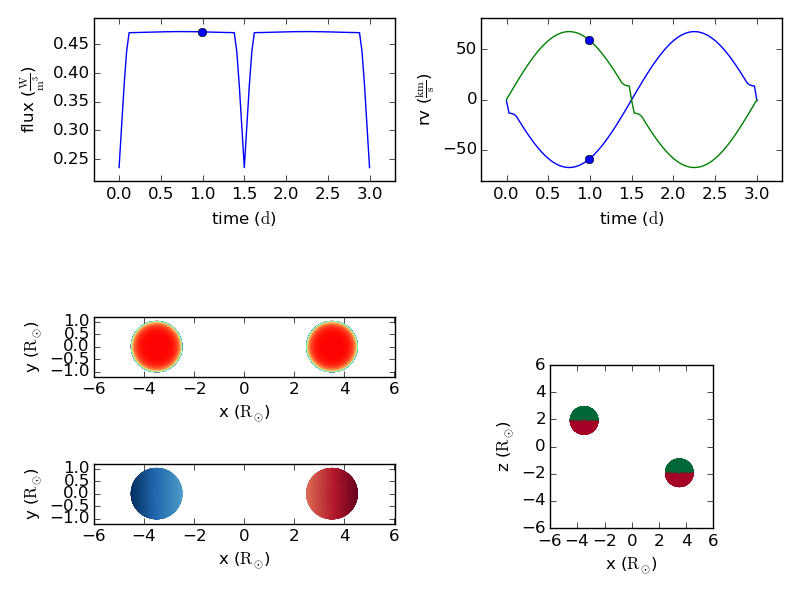
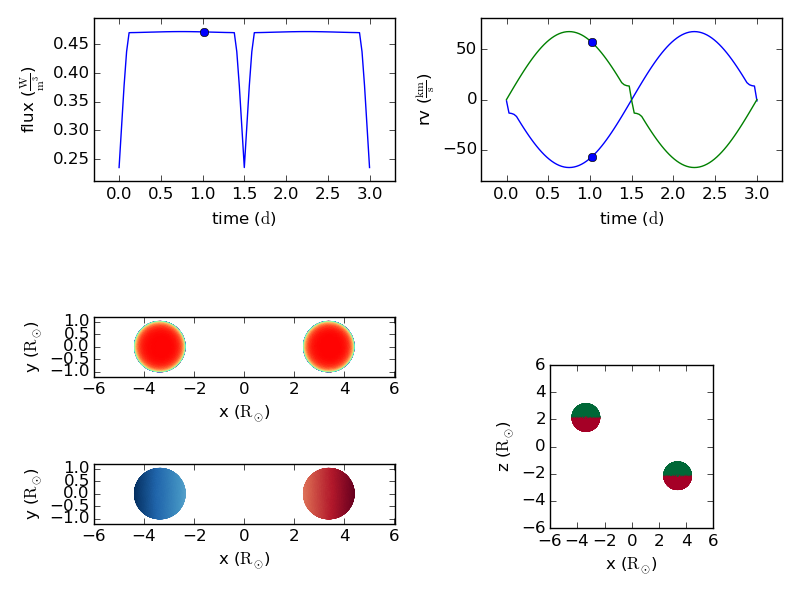
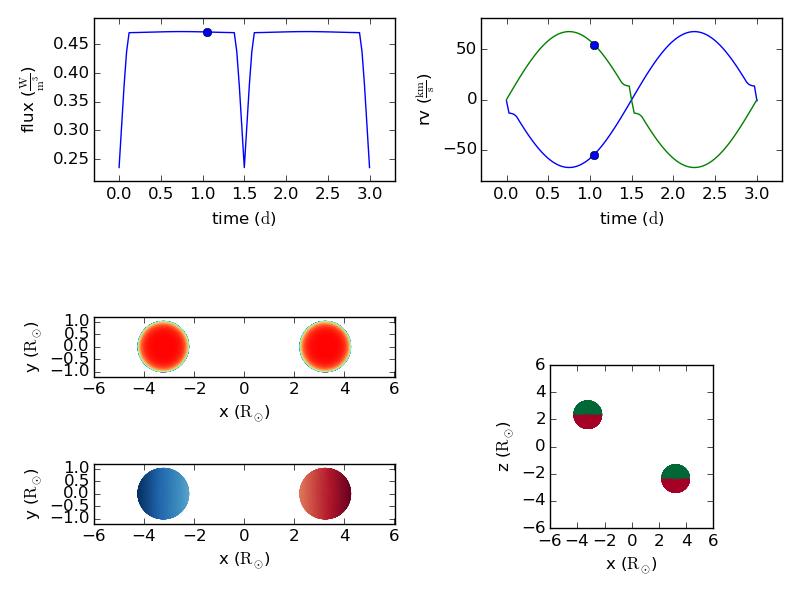
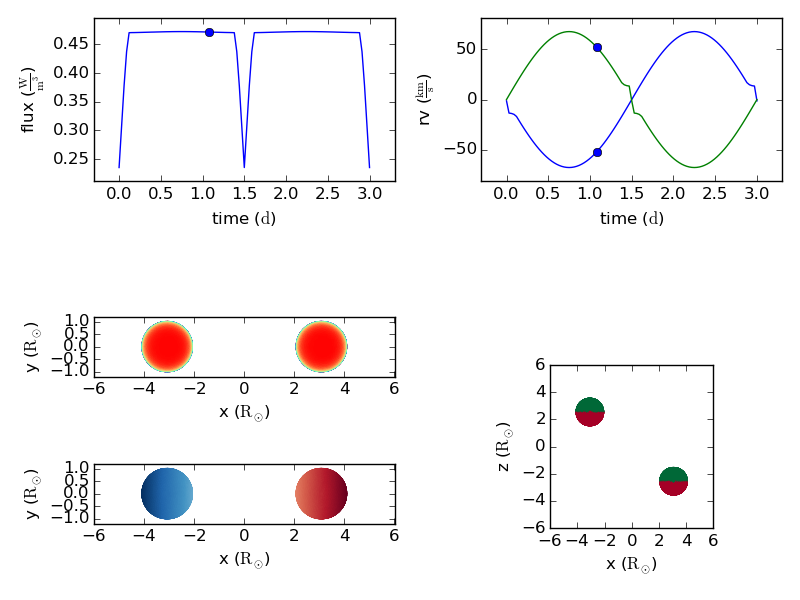
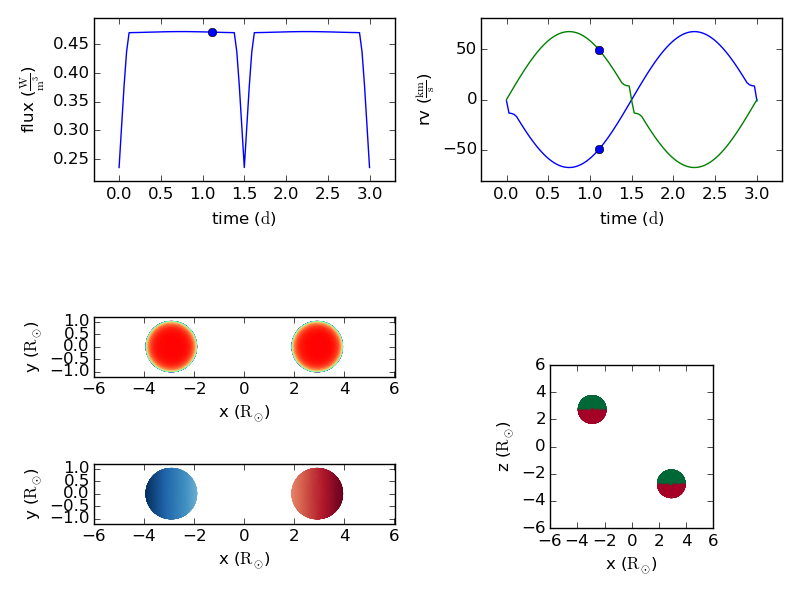
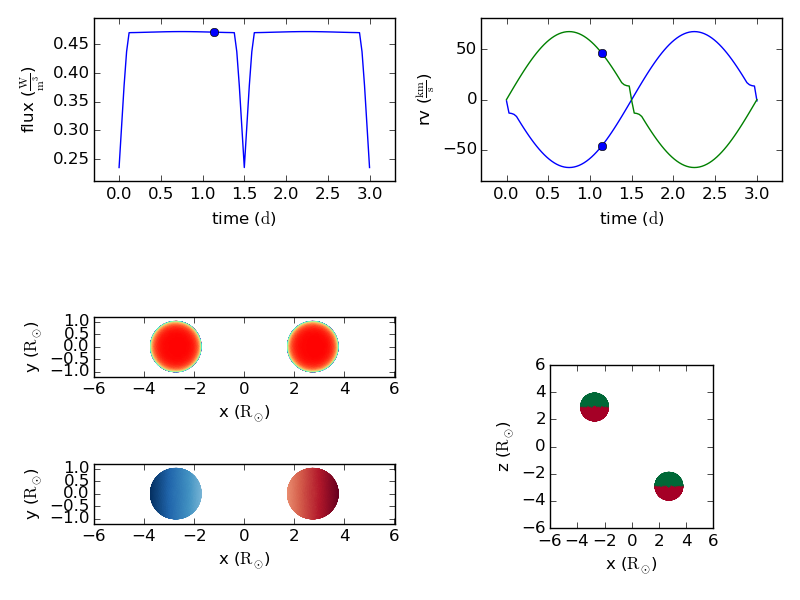
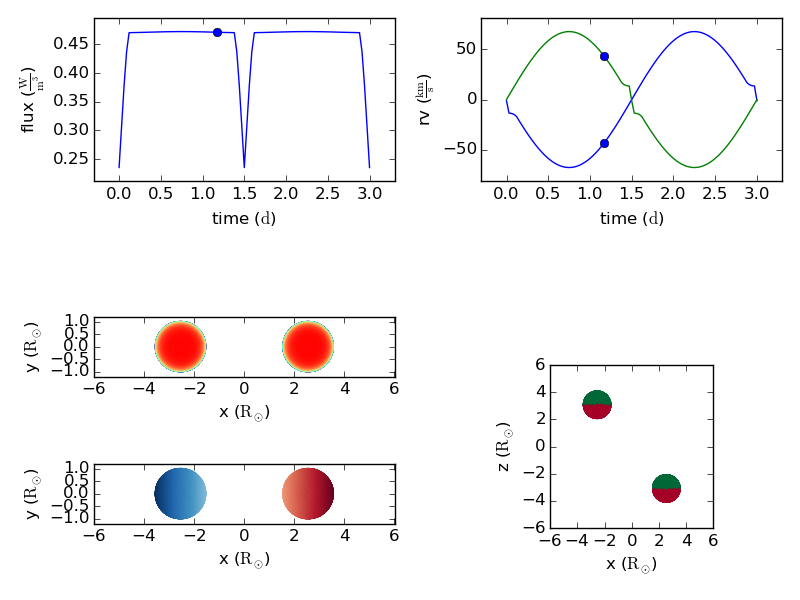
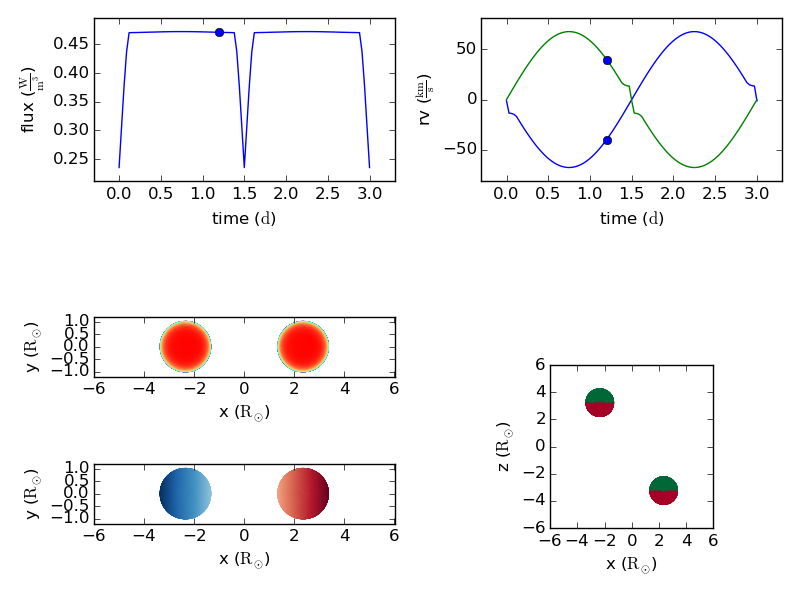
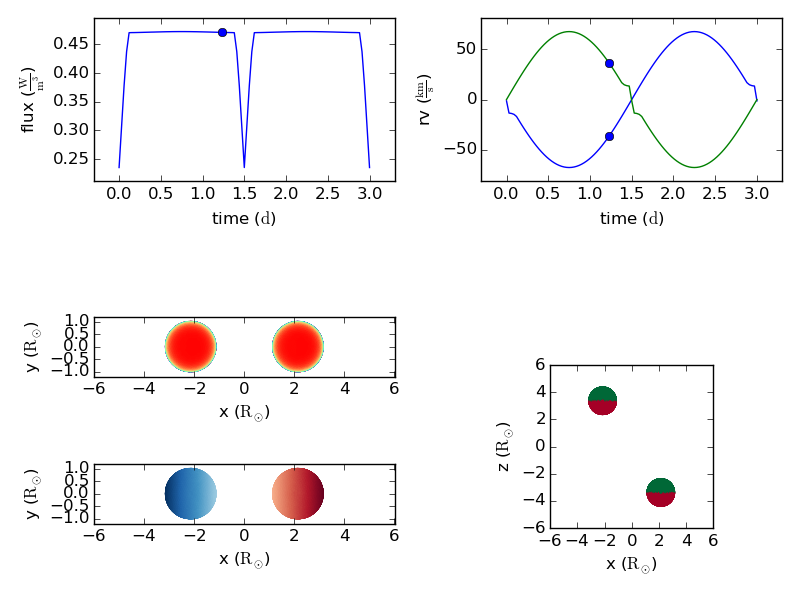
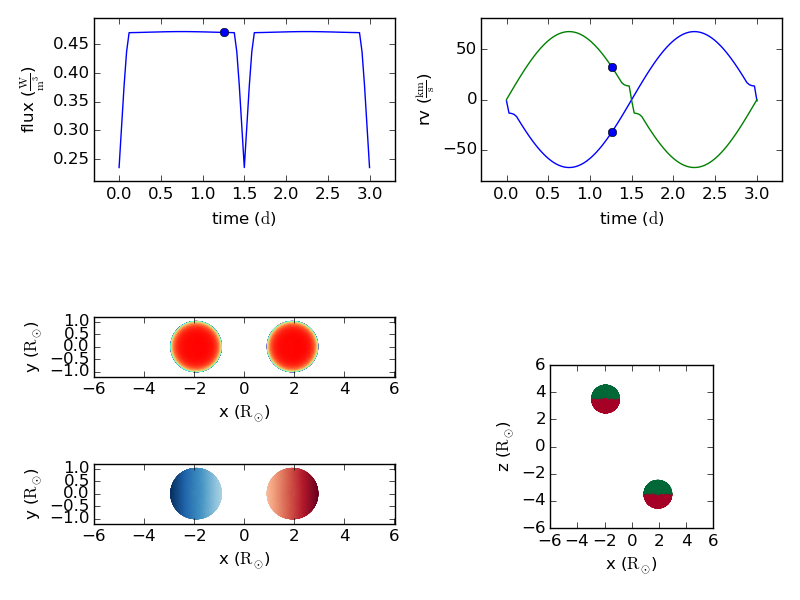
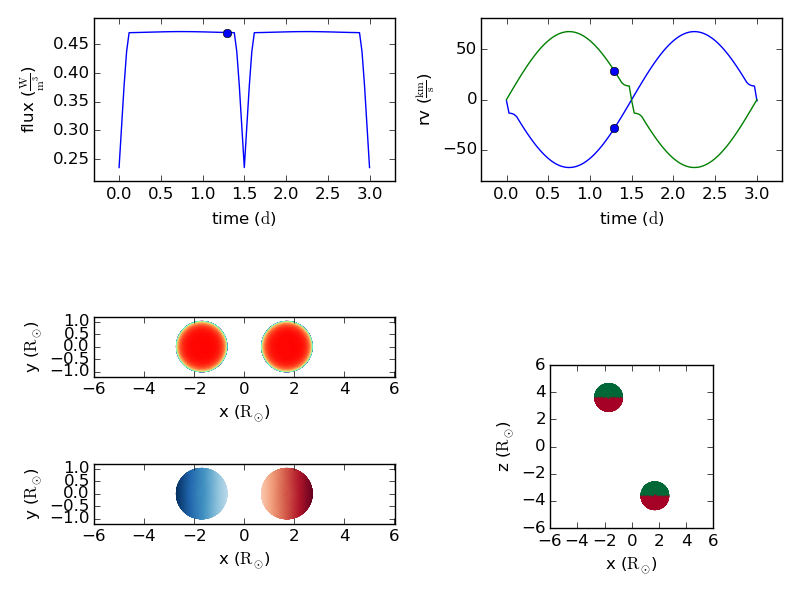
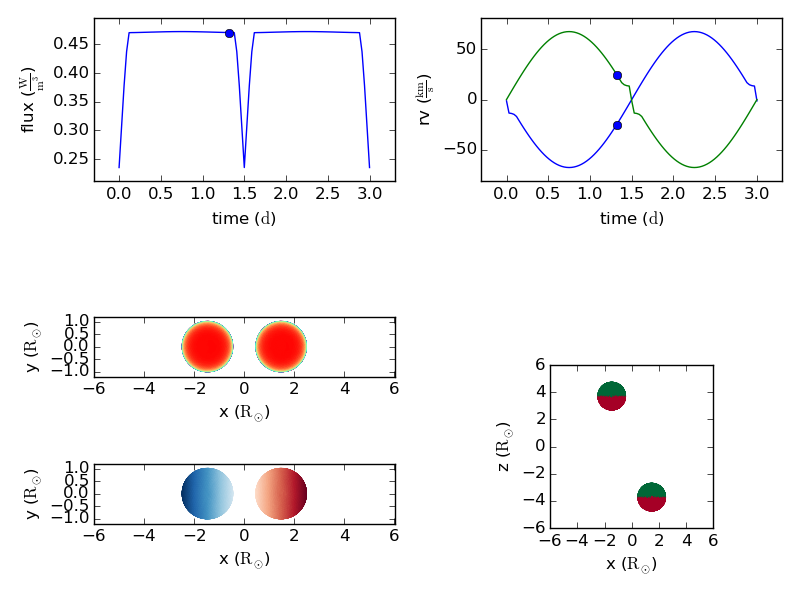
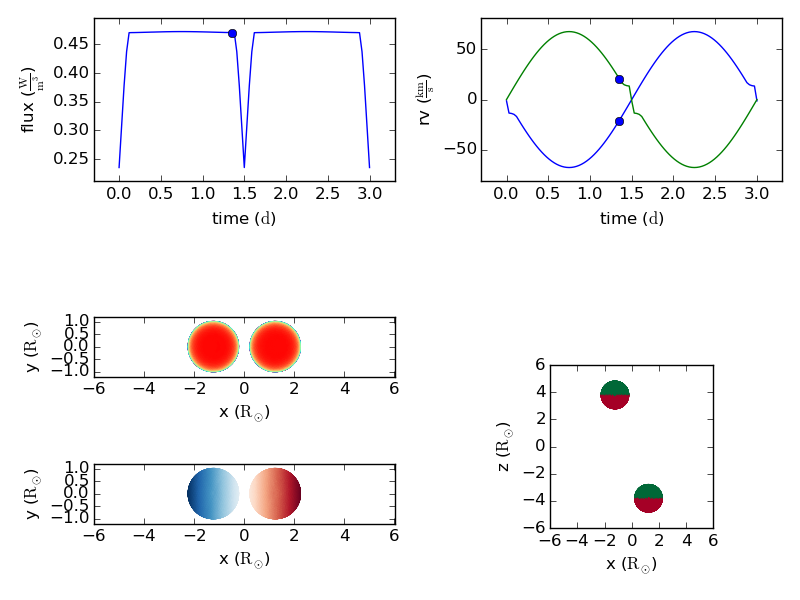
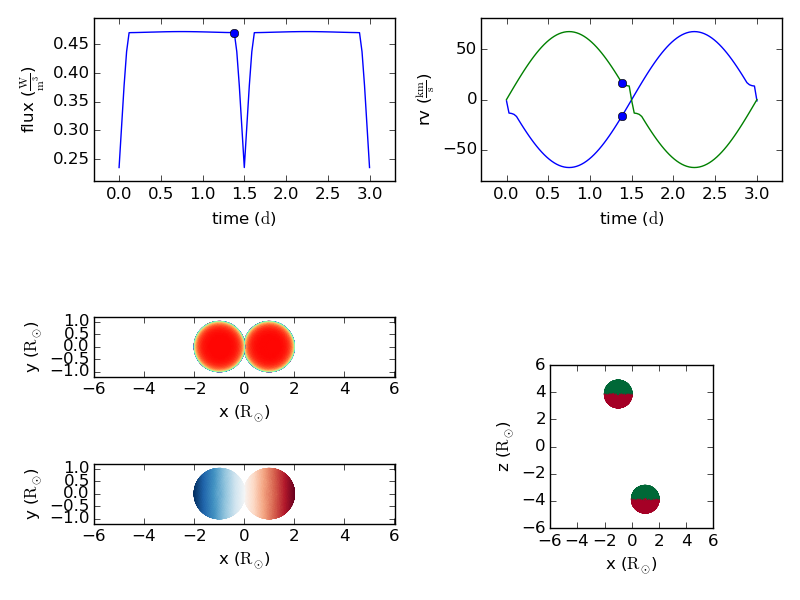
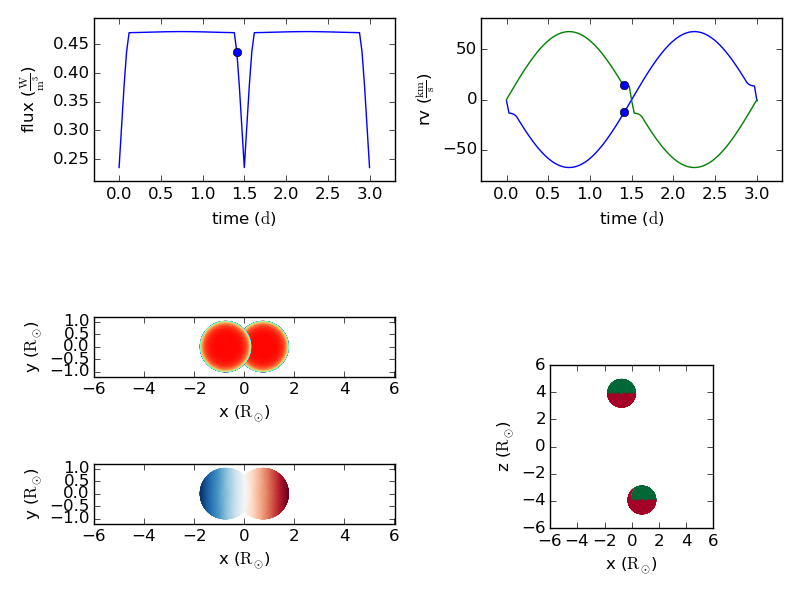
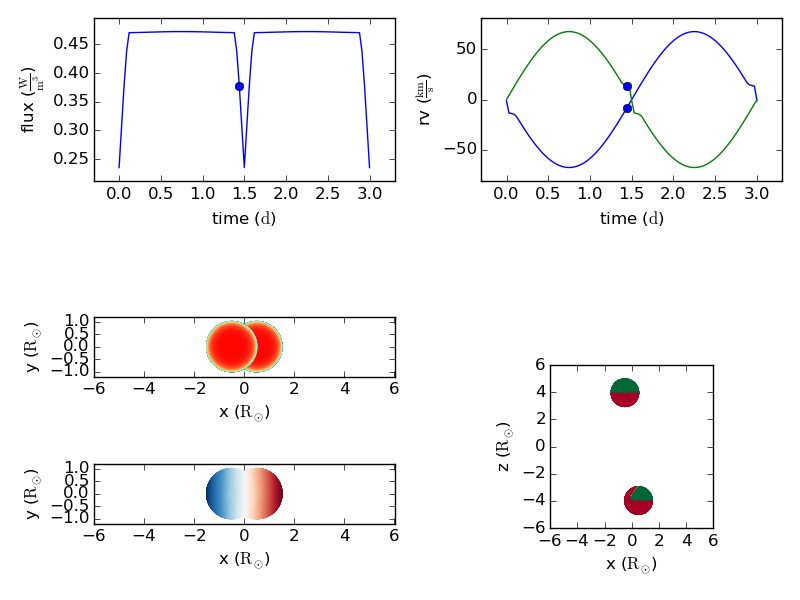
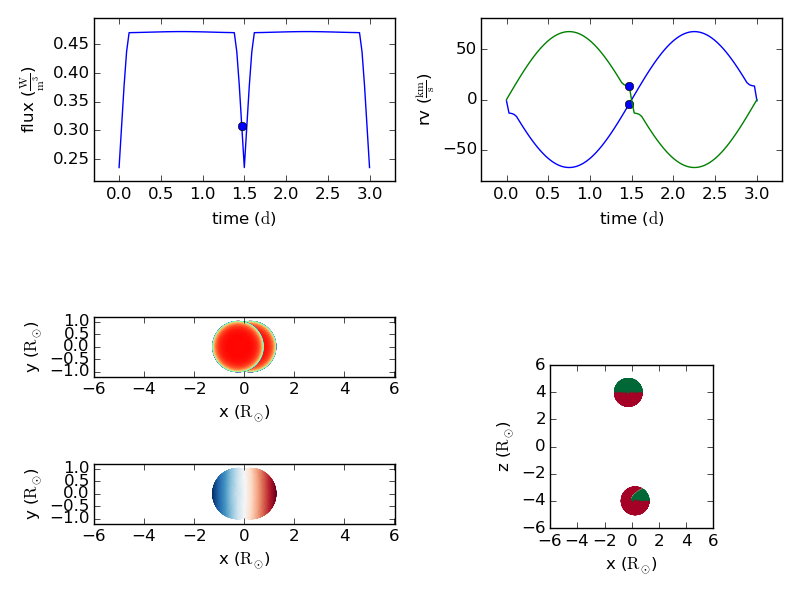
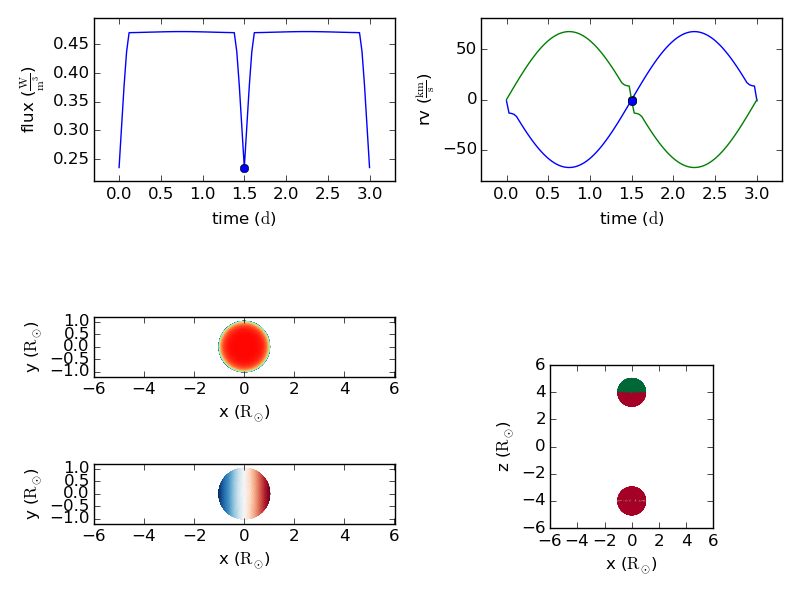
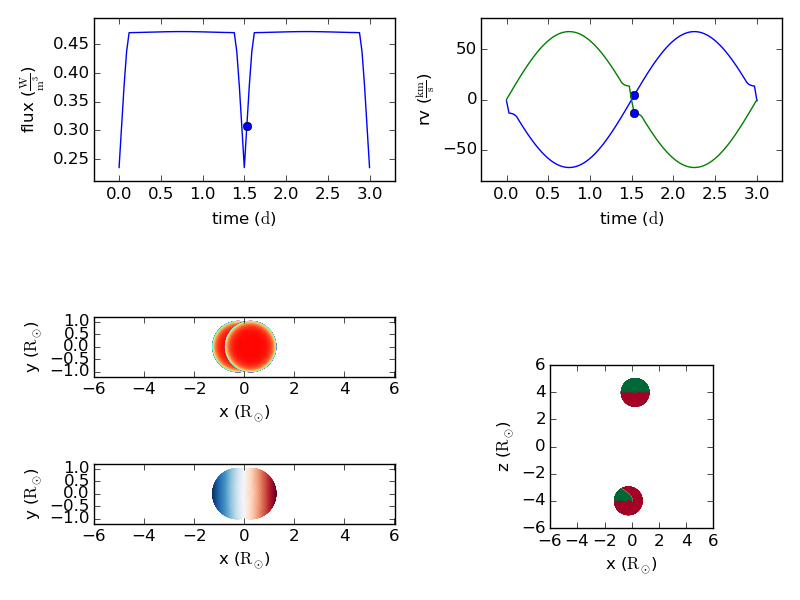
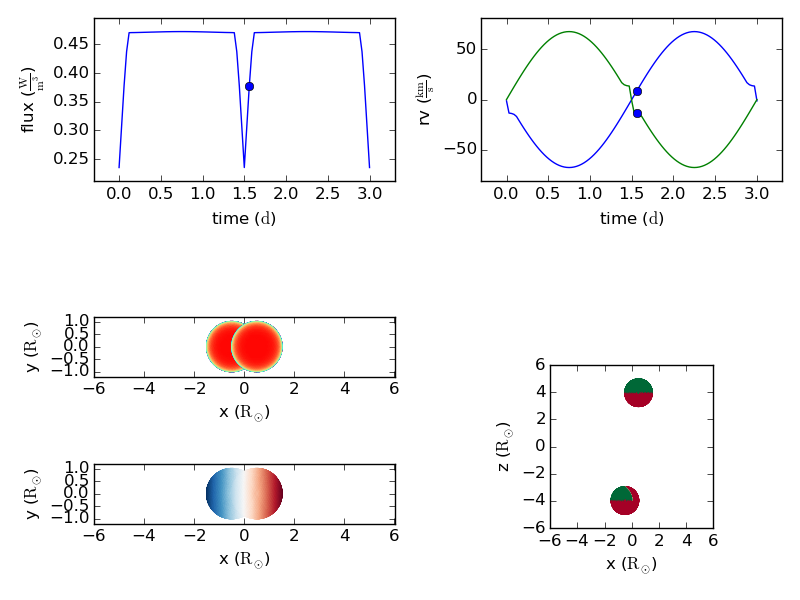
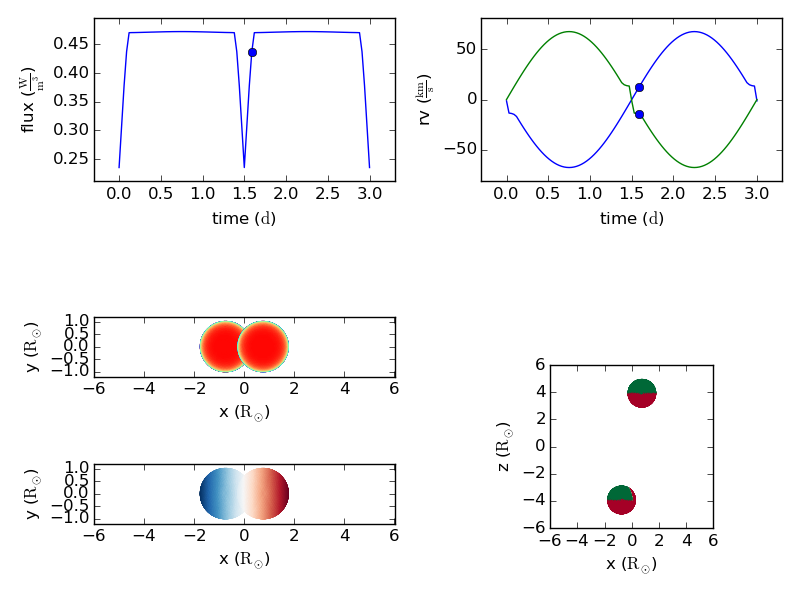
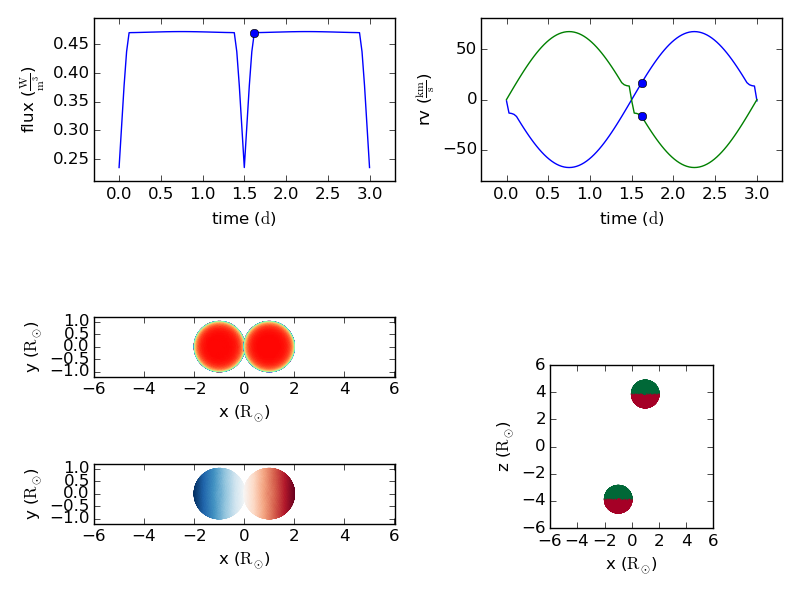
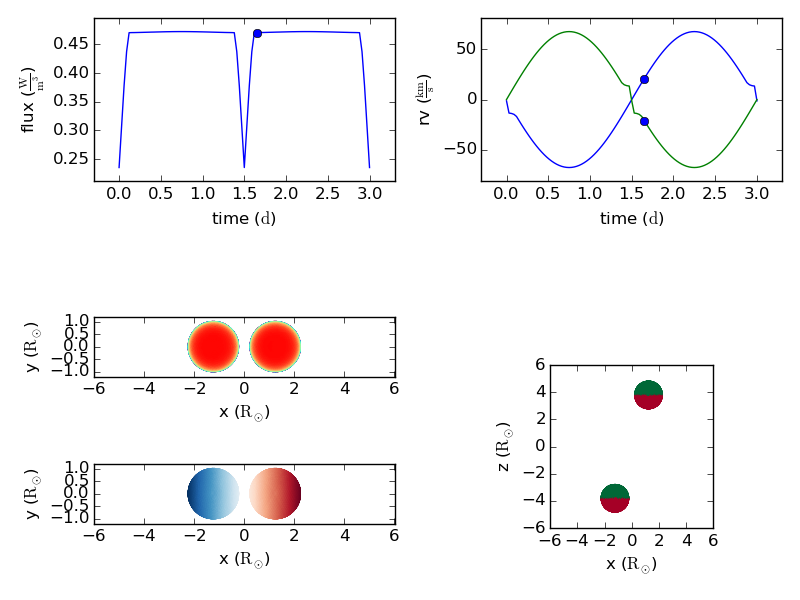
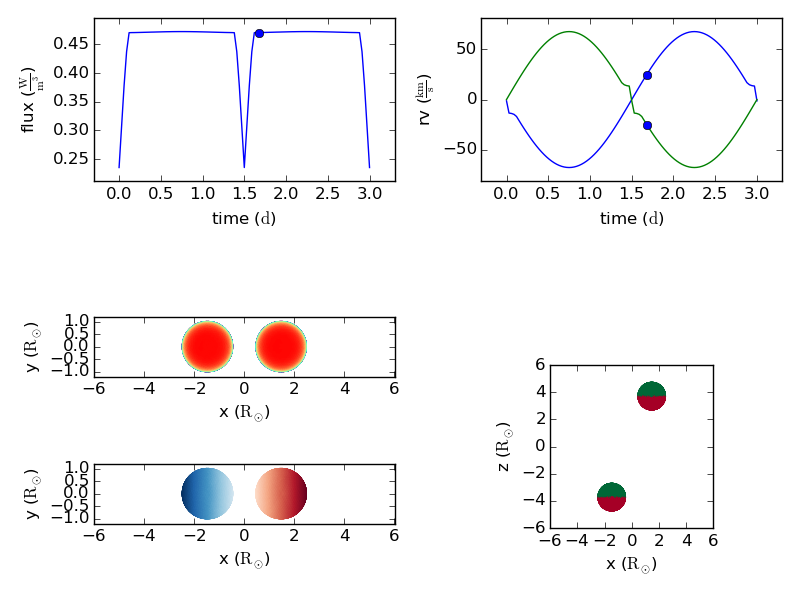
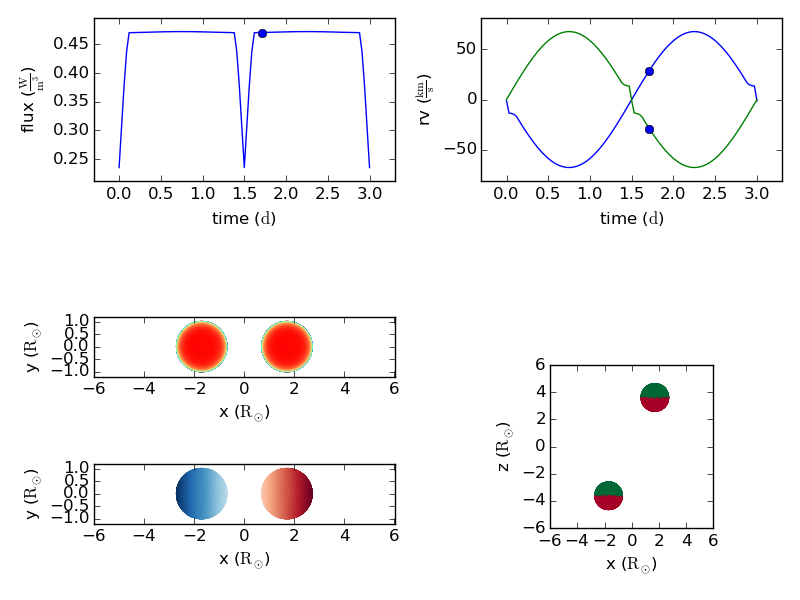
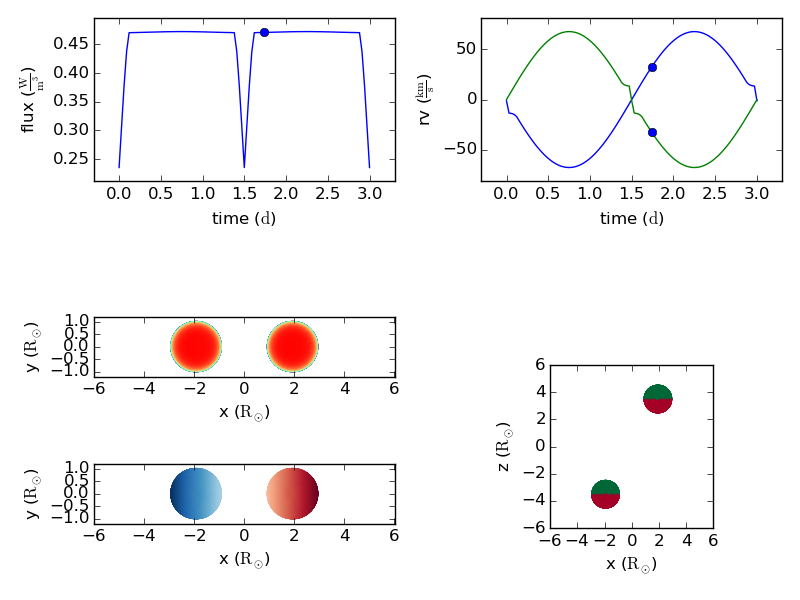
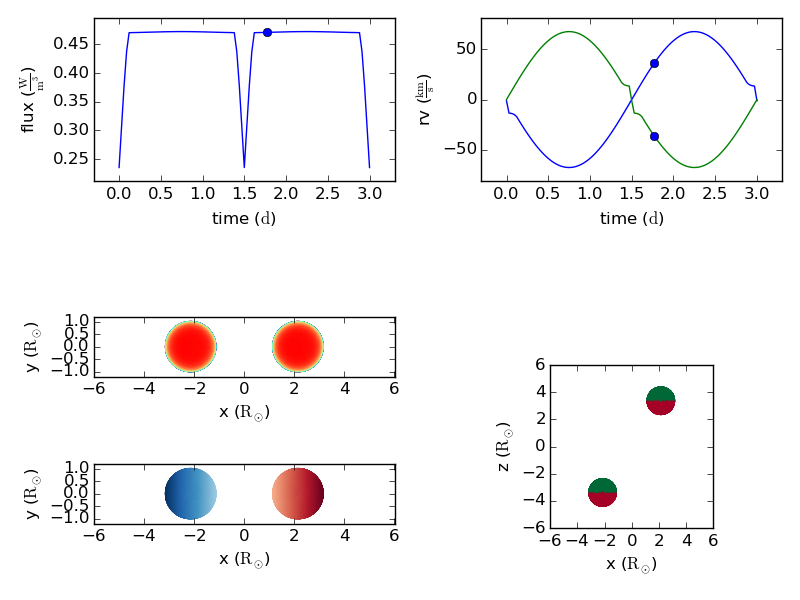
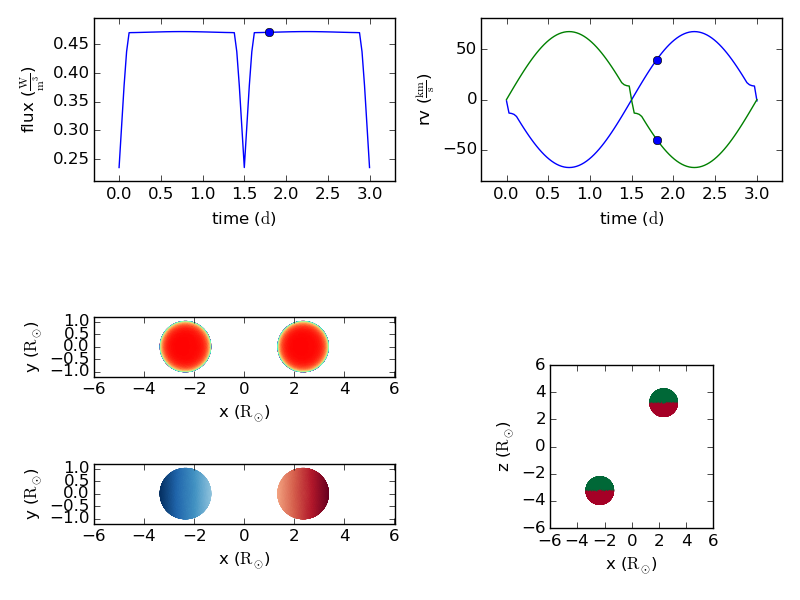
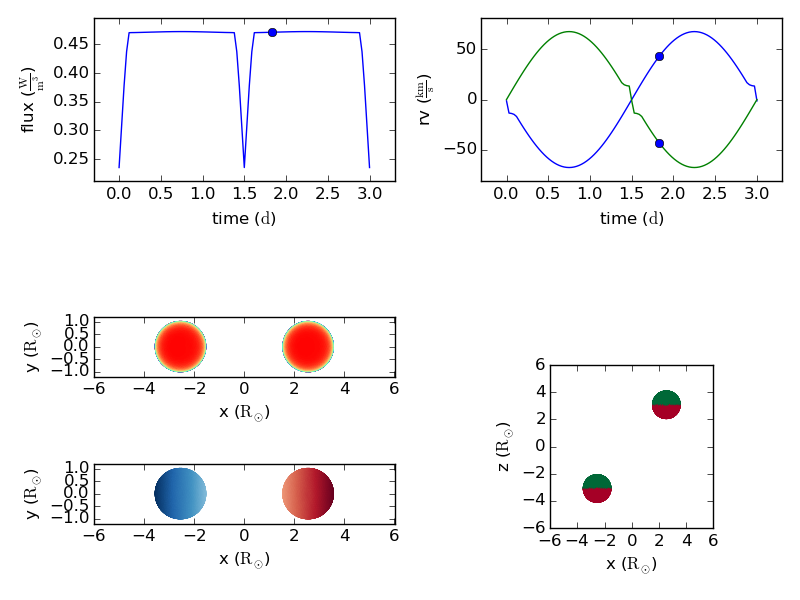
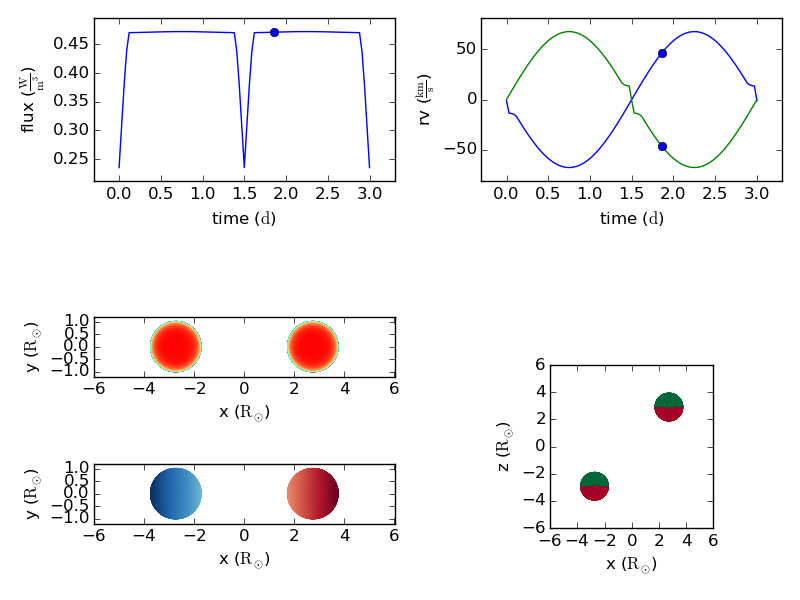
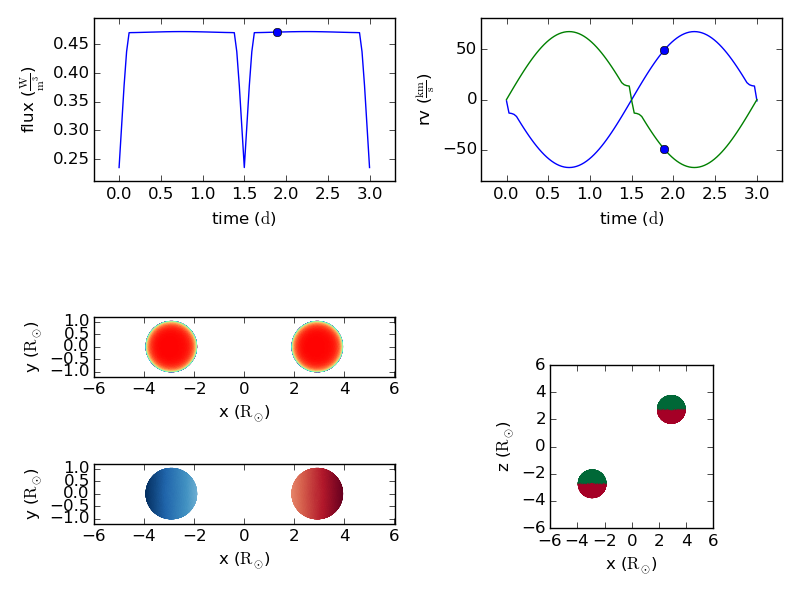
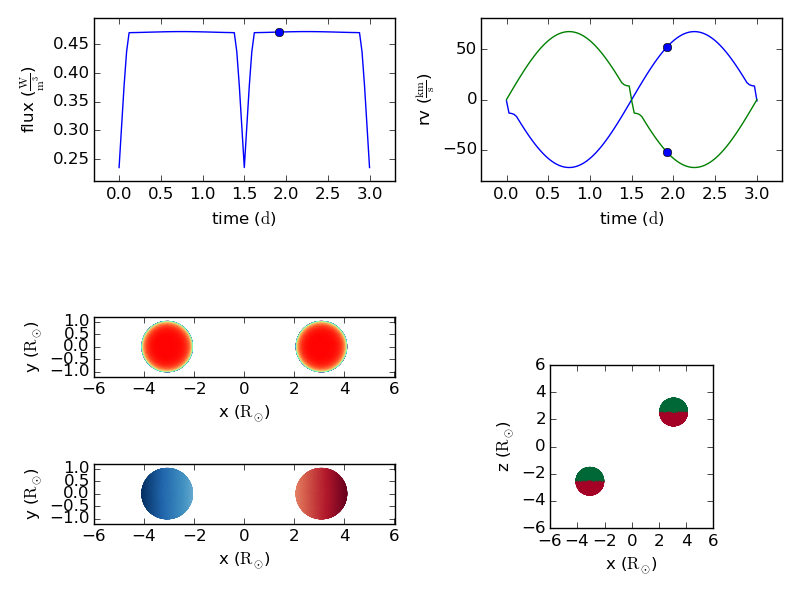
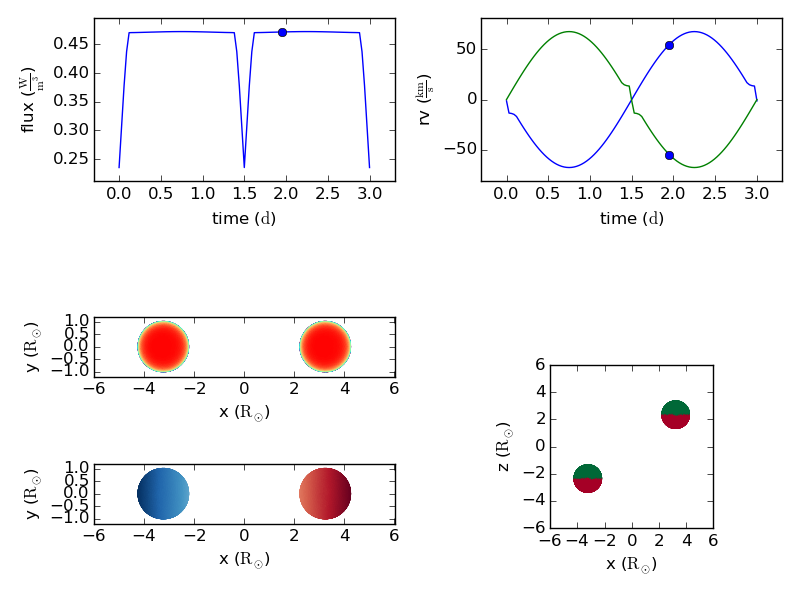
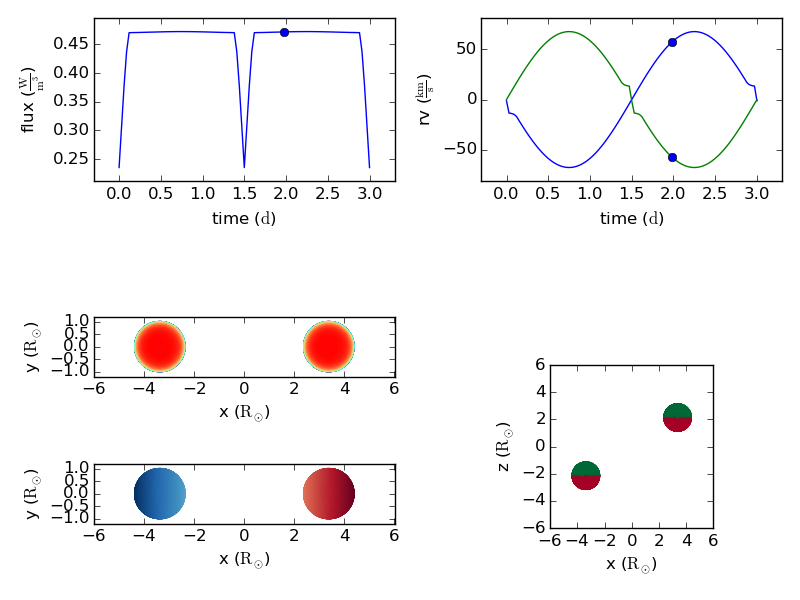
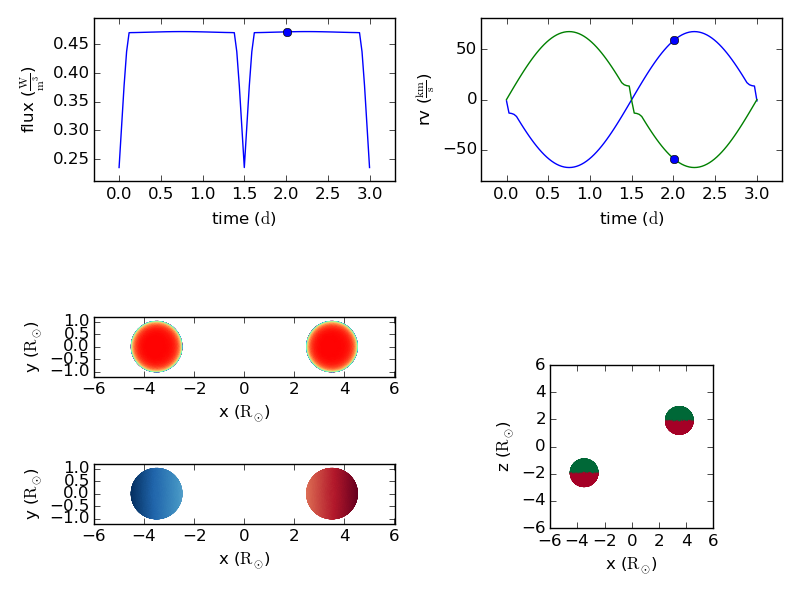
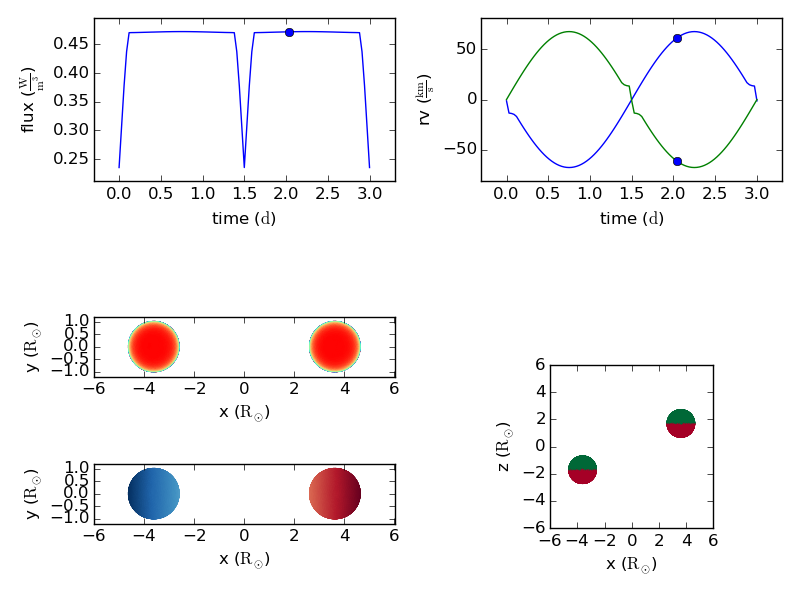
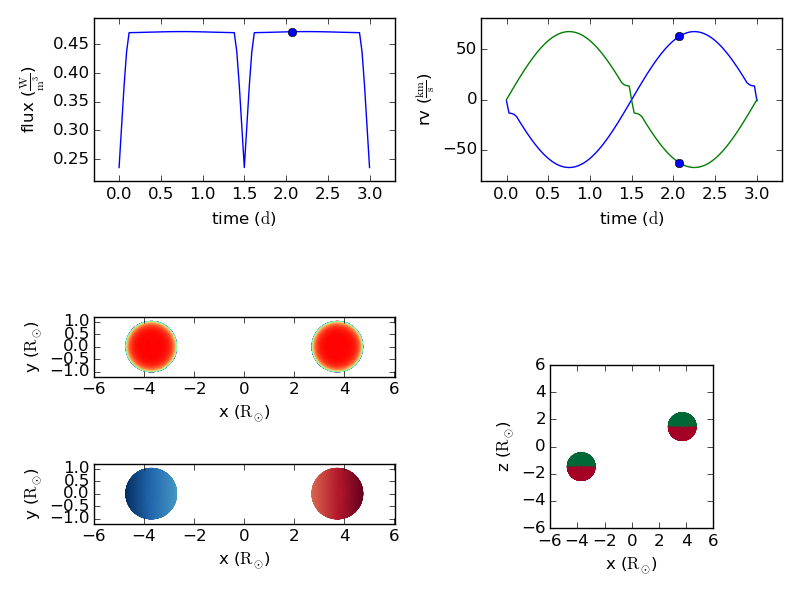
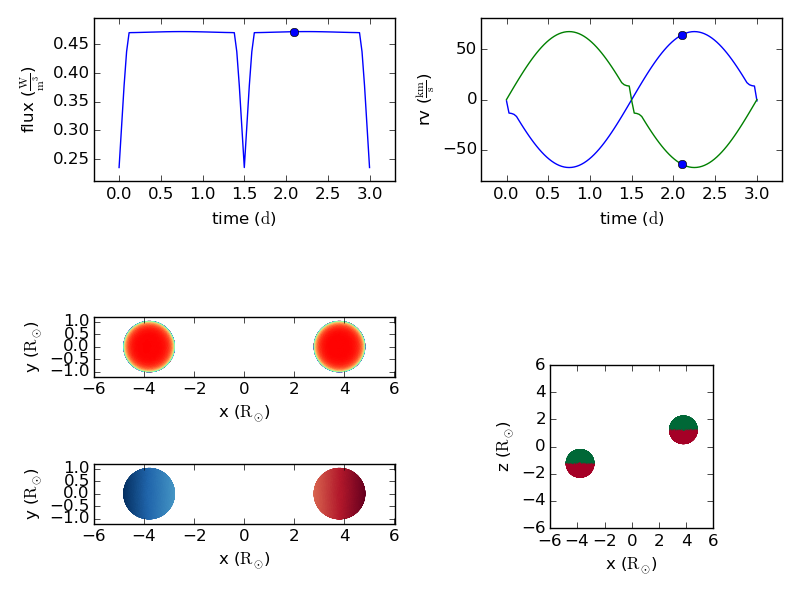
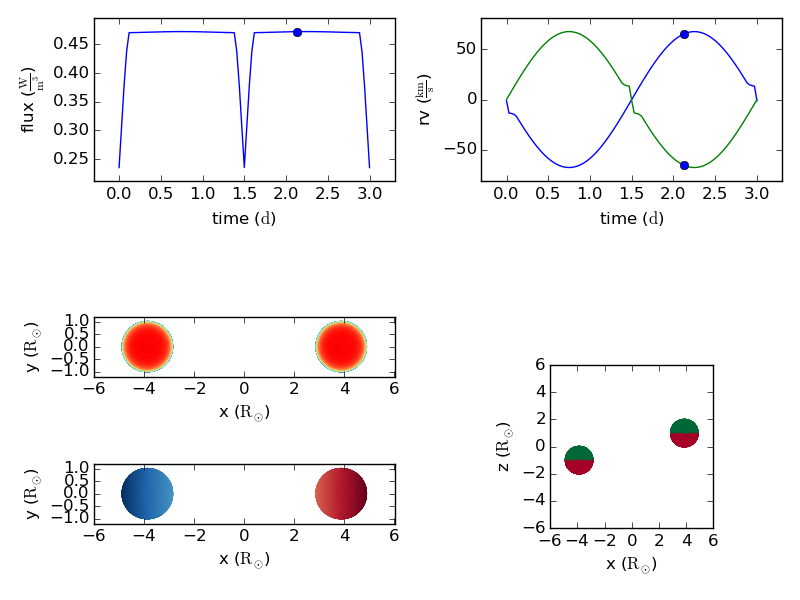
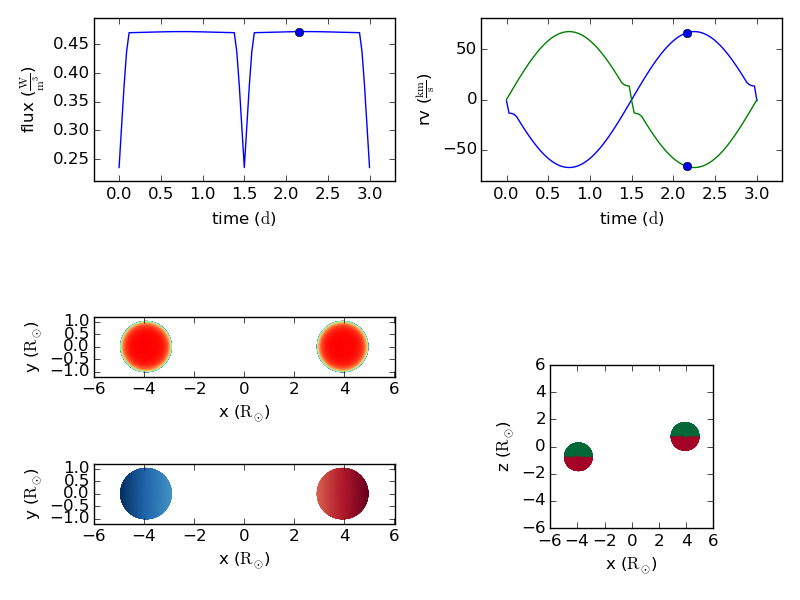
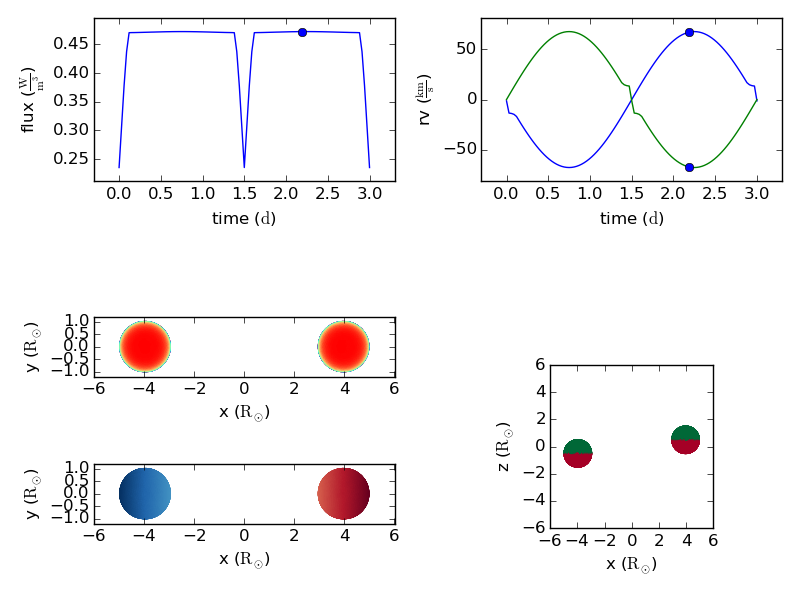
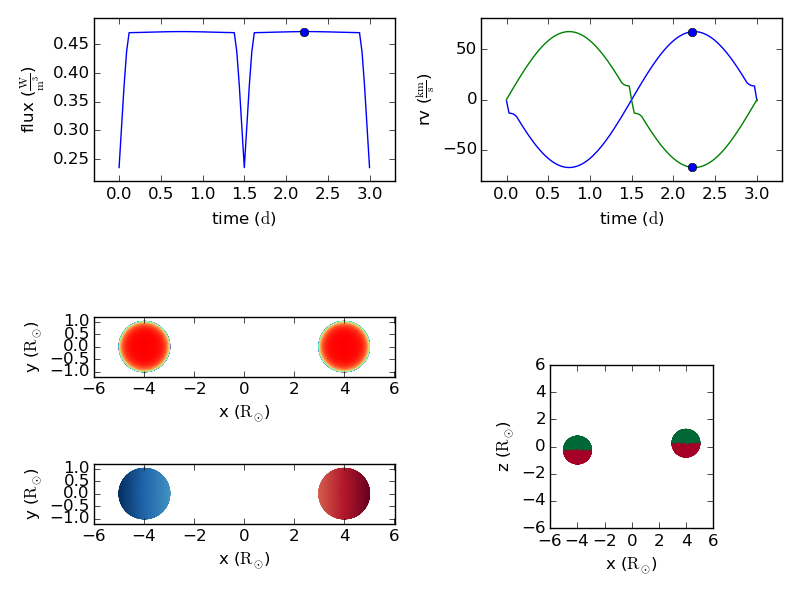
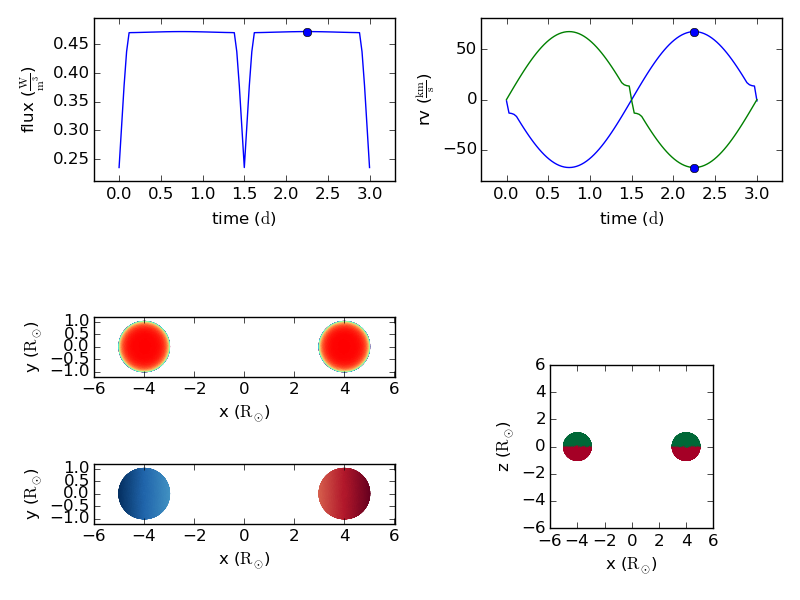
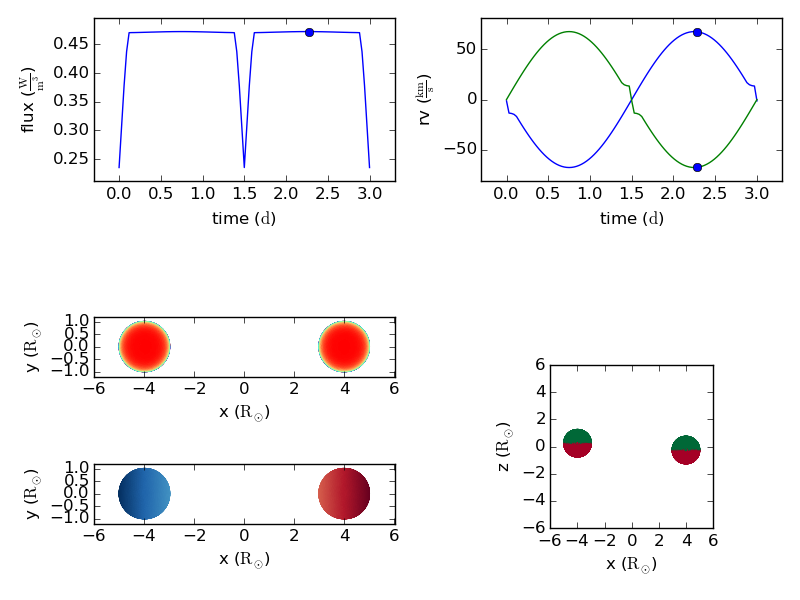
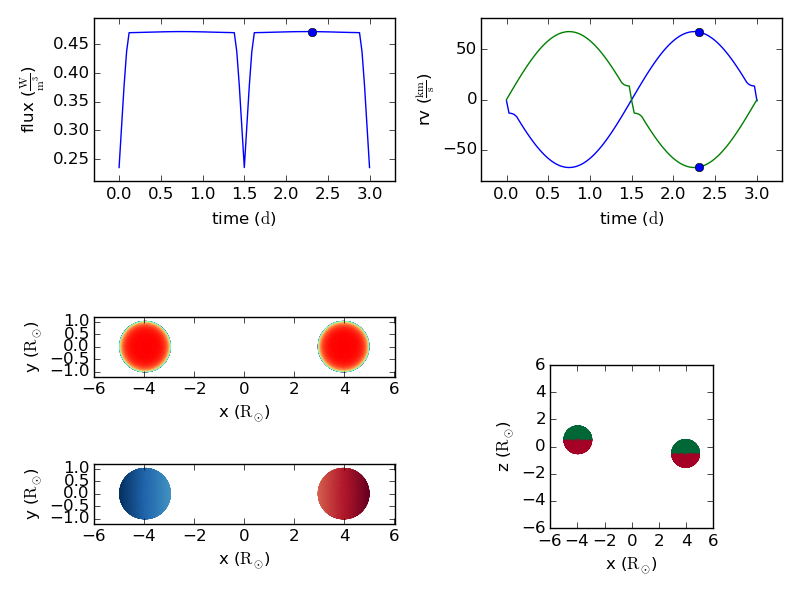
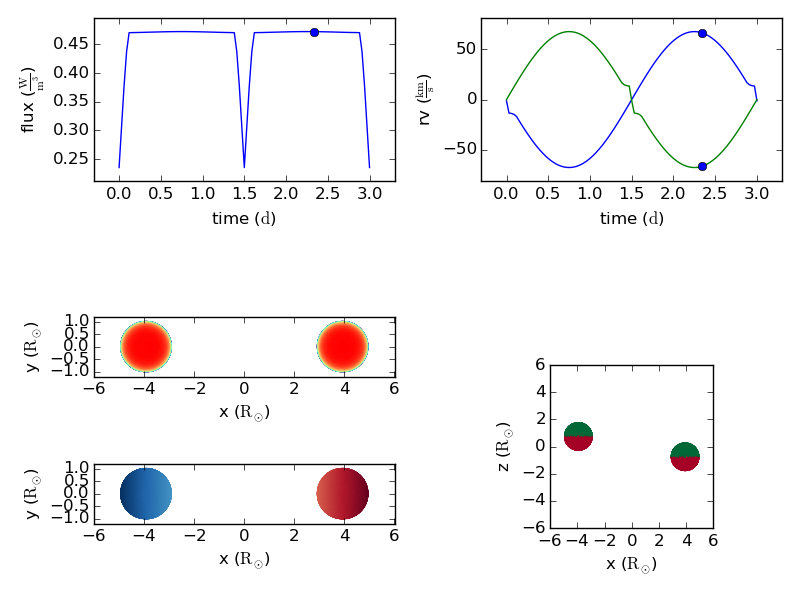
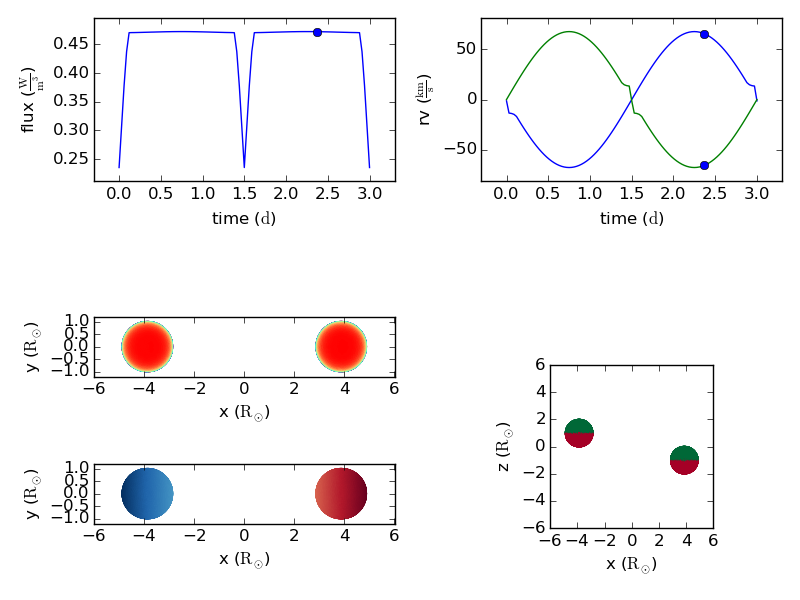
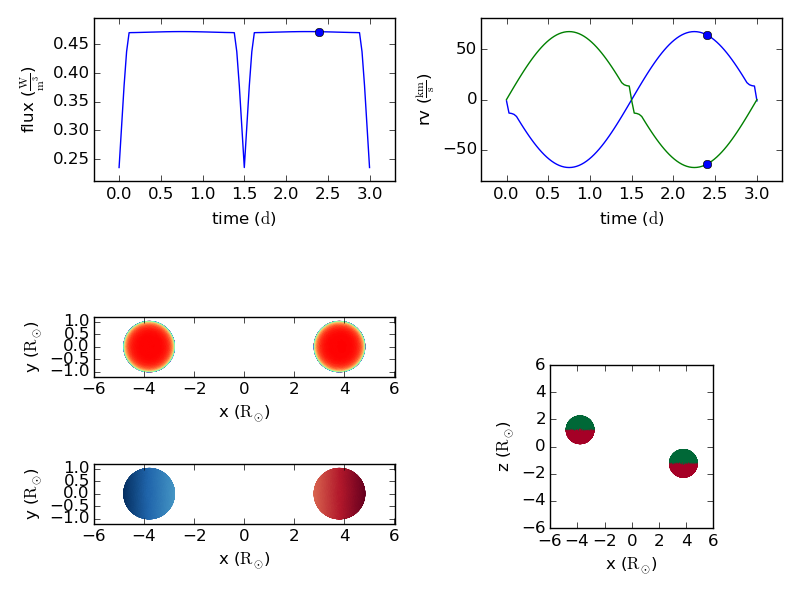
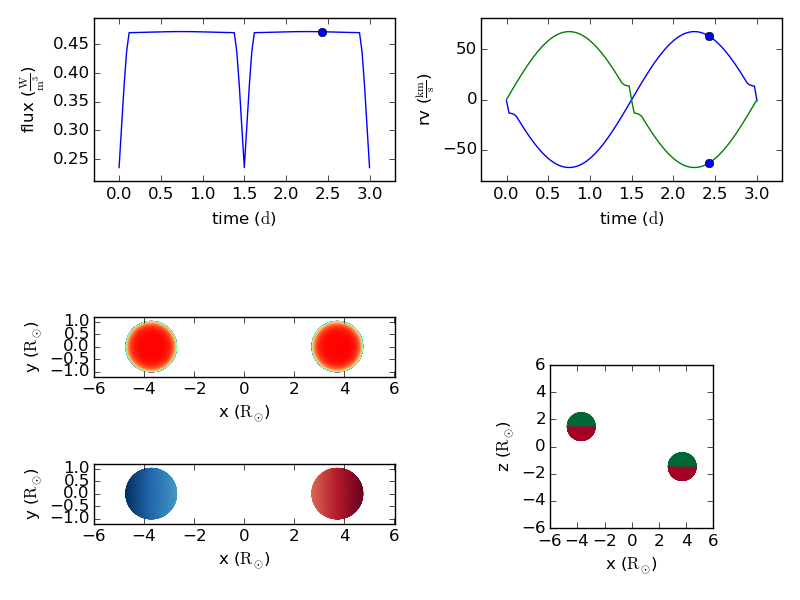
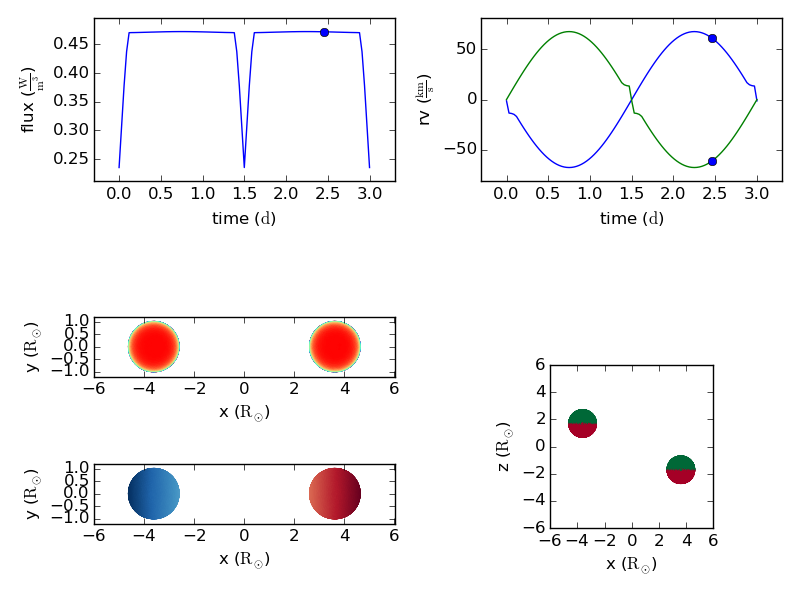
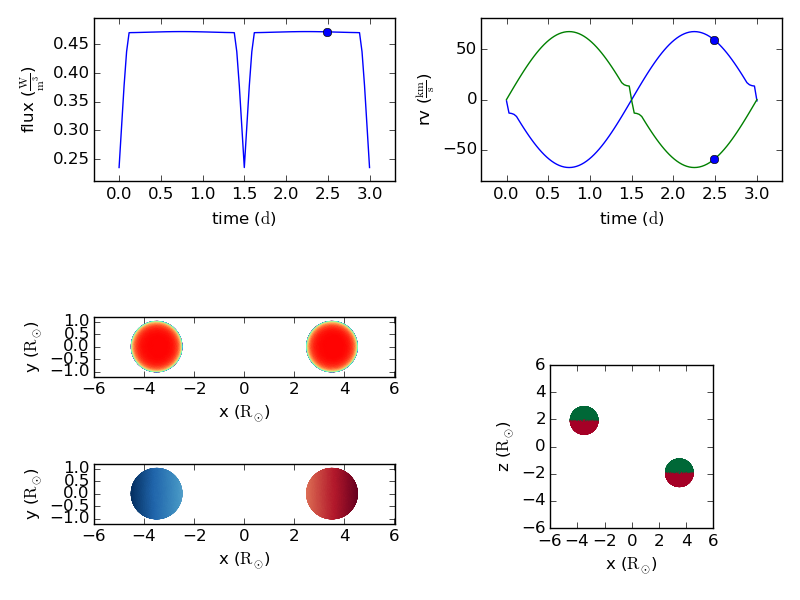
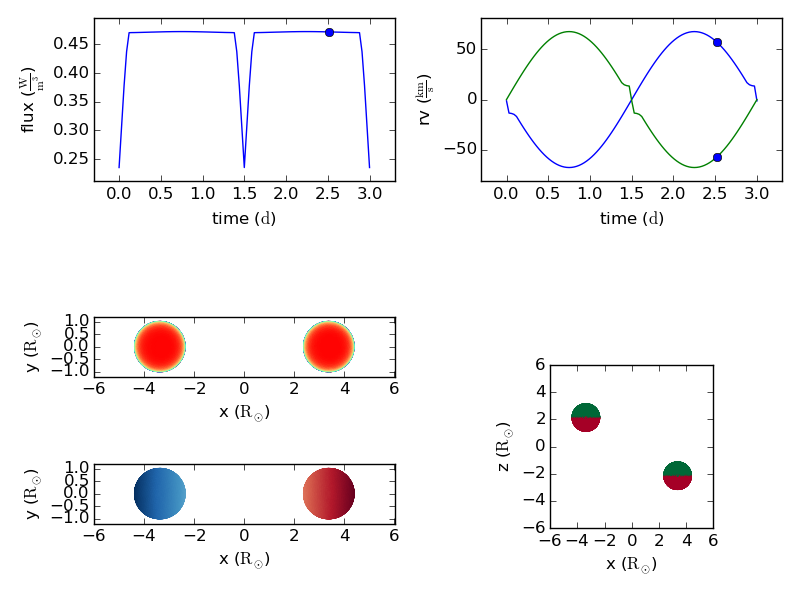
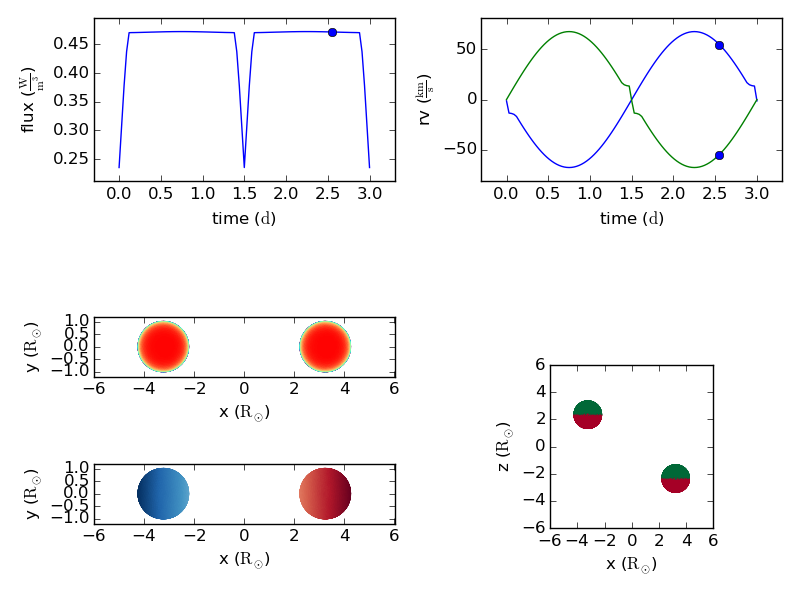
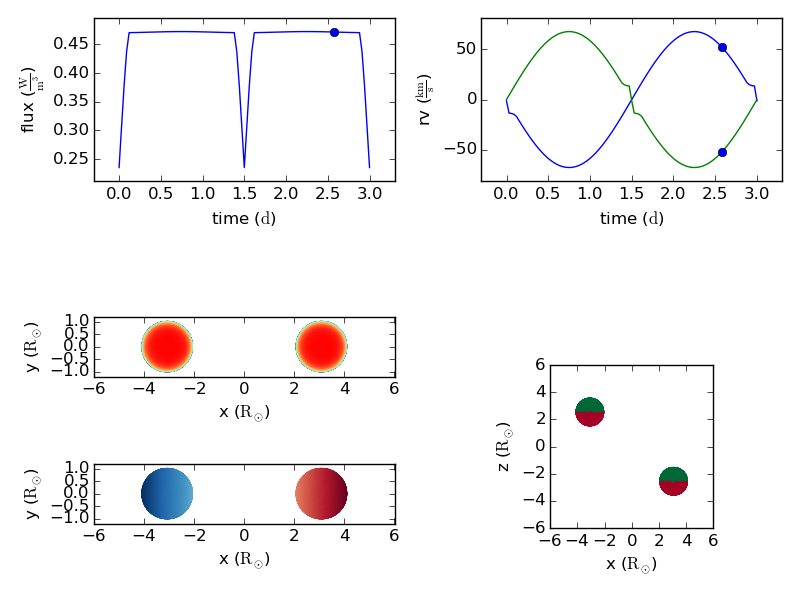
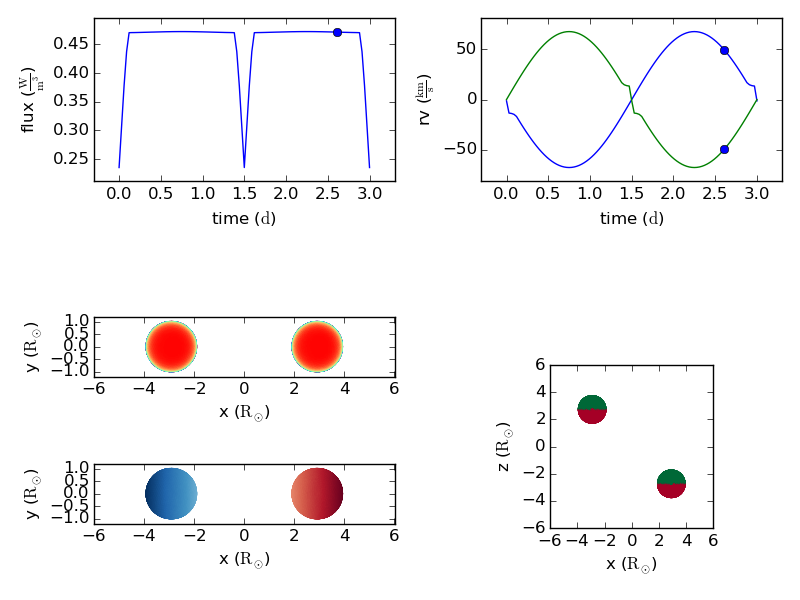
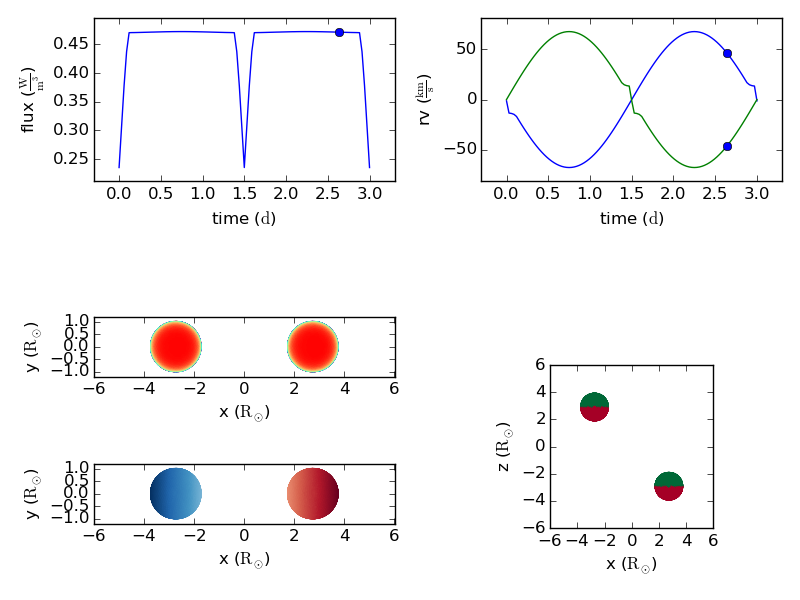
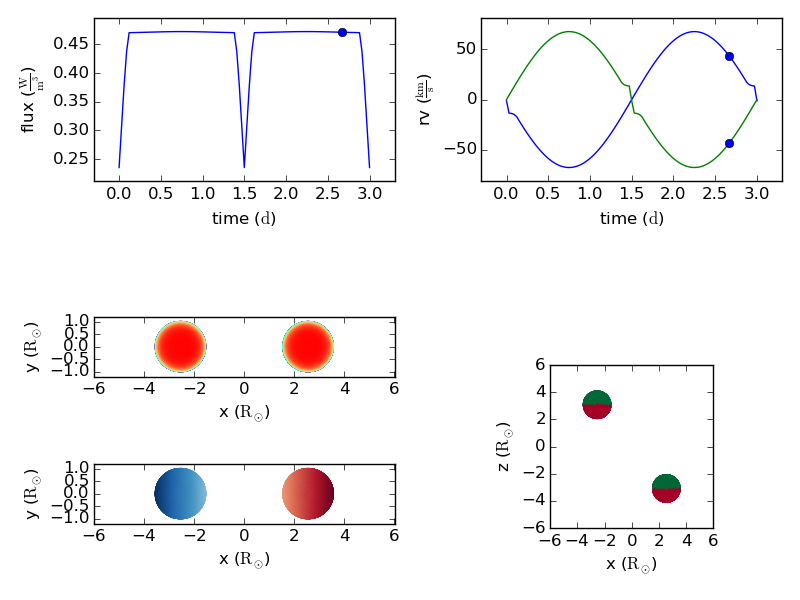
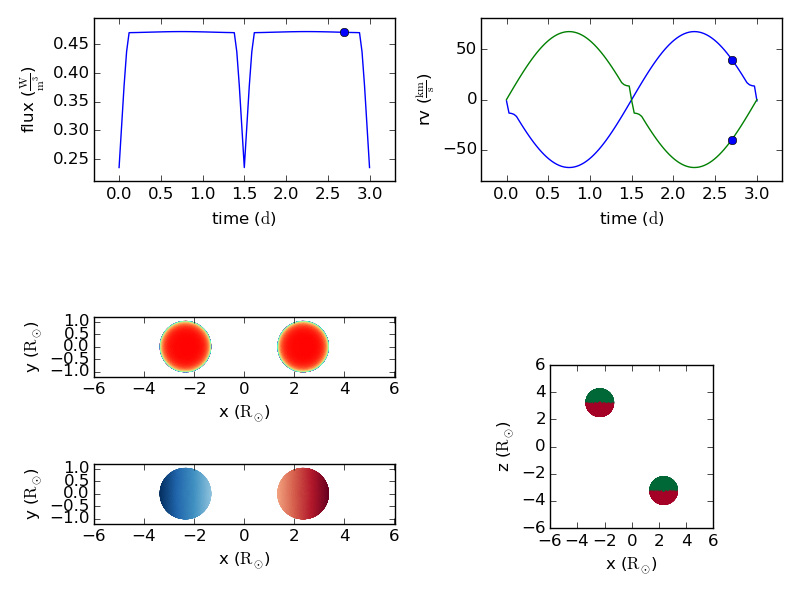
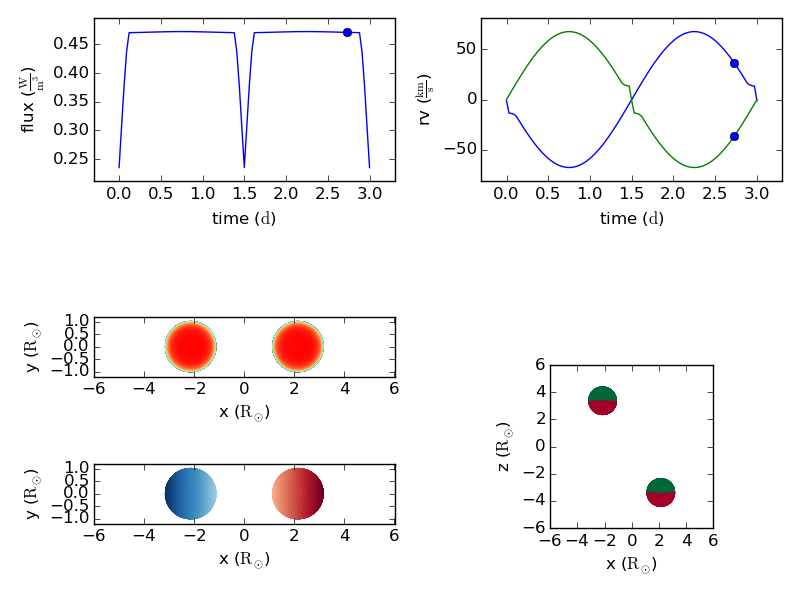
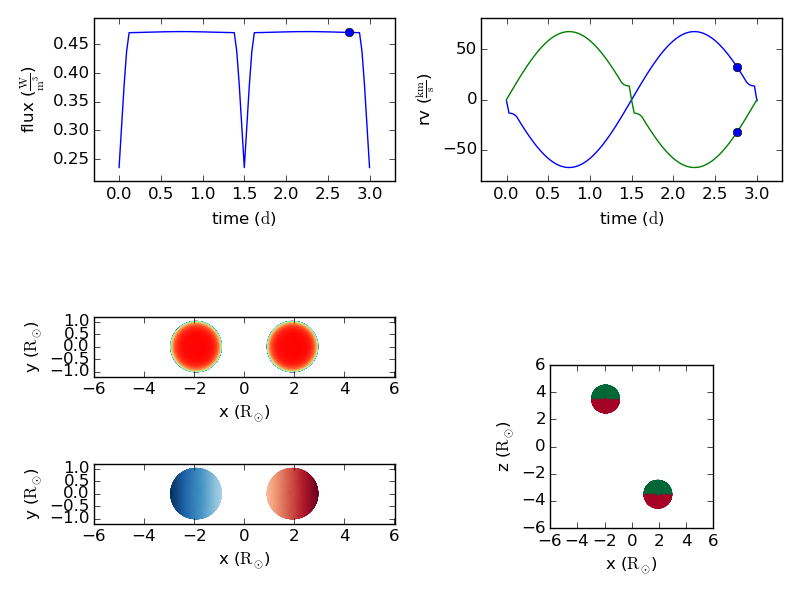
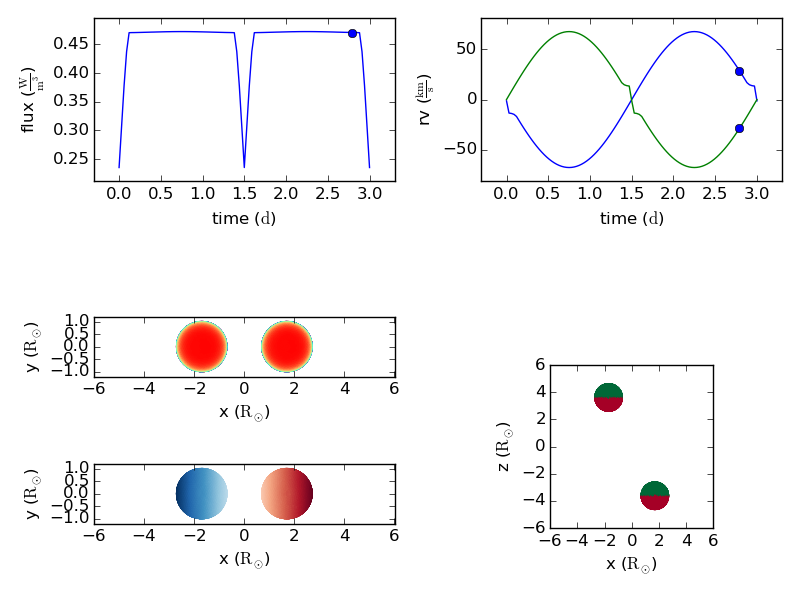
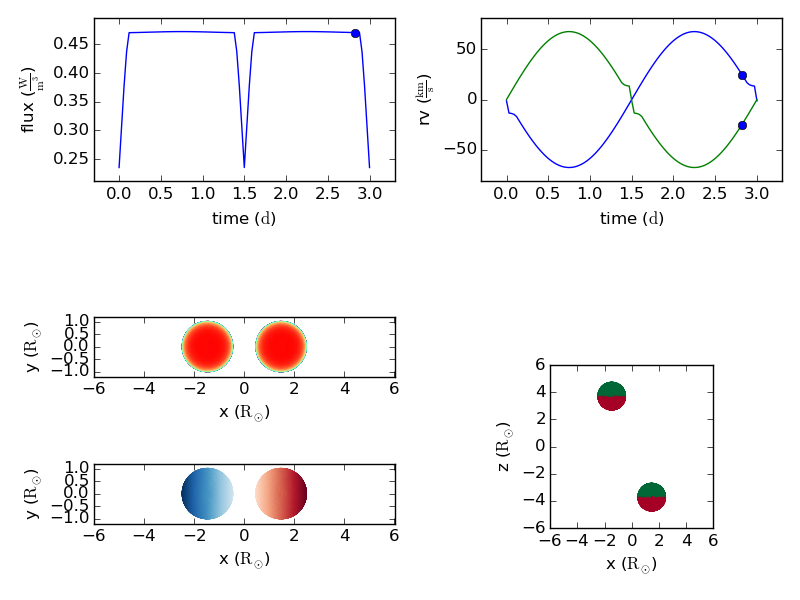
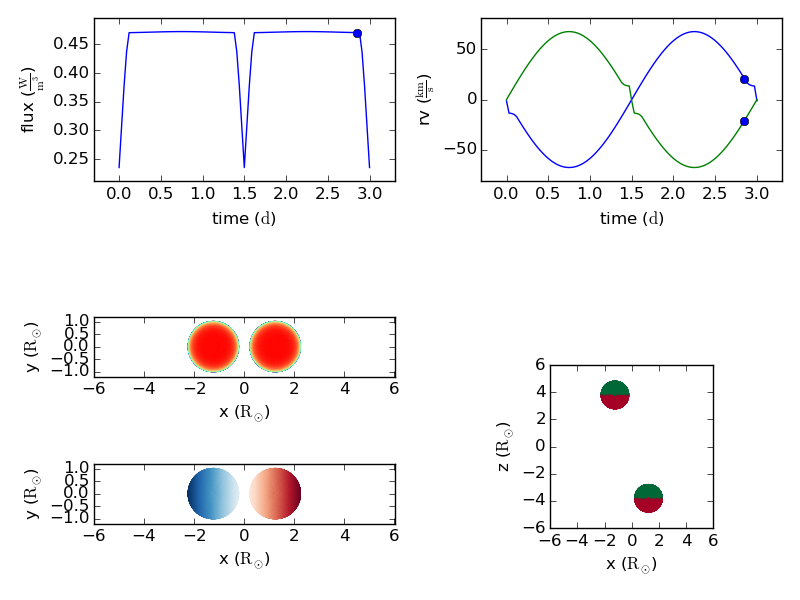
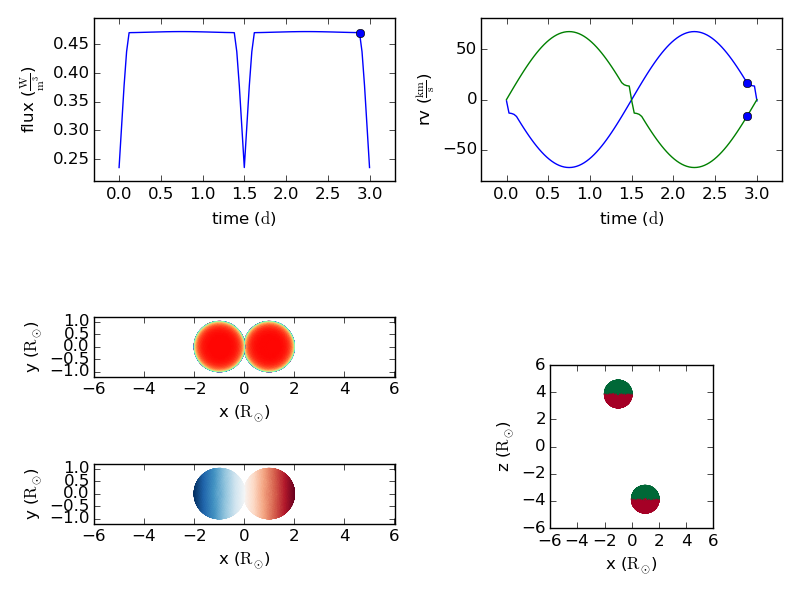
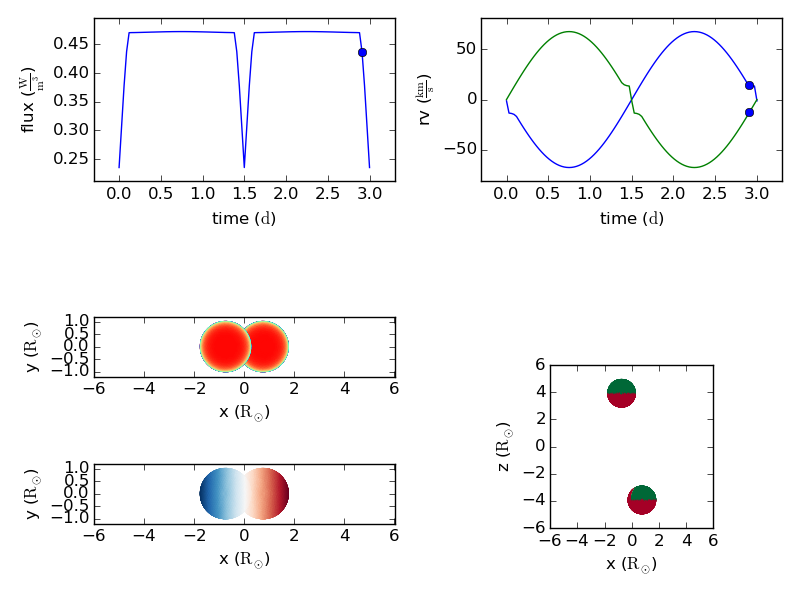
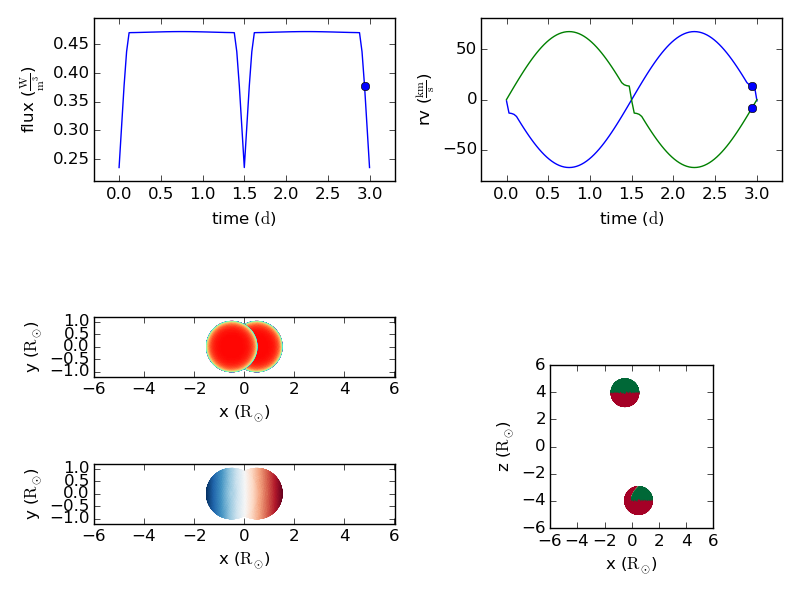
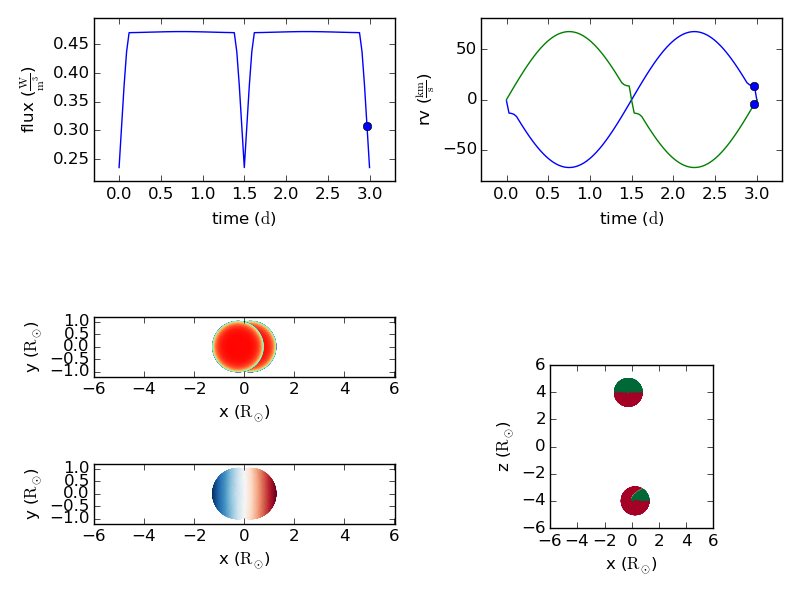

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(425, aspect='equal')
ax4 = fig.add_subplot(427, aspect='equal')
ax5 = fig.add_subplot(224, aspect='equal')

plot1 = {'twig': 'lc01@model', 'ax': ax1}
plot2 = {'twig': 'rv01@model', 'ax': ax2}
plot3 = {'twig': 'MESH@model', 'facecolor': 'intens_proj_rel@lc01', 'edgecolor': None, 'ax': ax3}
plot4 = {'twig': 'MESH@model', 'facecolor': 'rv@rv01', 'edgecolor': None, 'ax': ax4}
plot5 = {'twig': 'MESH@model', 'facecolor': 'visibility', 'edgecolor': None, 'y': 'z', 'ax': ax5}

plots = (plot1, plot2, plot3, plot4, plot5)

b.animate(plots, times=times[:-1])